In [3]:
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

import math

import numpy as np
from numpy import array, dot, mean, std, hstack, asarray, exp, random
import numpy.random as npr
from numpy import linalg as LA
from numpy.linalg import inv
from numpy.random import normal

#import numba as nb
#from numba import guvectorize
import random
from random import randint
from random import gauss
from random import seed

from scipy import signal
from scipy import stats as ss
from scipy.stats import skew, kurtosis, norm, laplace, cauchy, uniform, expon, gamma
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.sparse
from scipy.sparse.linalg import spsolve
import scipy.special as scsp
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import minimize, Bounds

import statistics
import statsmodels.api as sm

# plotting/graphing related libraries

#data management
import pandas as pd
from pandas import Series, DataFrame
import yfinance as yf

#plotting and graphing libraries
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from pylab import plt, mpl

import time
from datetime import datetime, date, timedelta, timezone
#
from IPython.display import display, HTML
import warnings
import sympy as sym
from sympy import symbols, exp

#excel things
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

import cvxpy as cvx
import cvxopt
from qpsolvers import solve_qp
import qpsolvers
from cvxopt import matrix, solvers

from IPython.display import Math
#Math(r"x_t = x_{t - 1} \cdot e^{{r-0.5*\sigma^2}/2} \cdot dt + \sigma/2 * \sqrt{dt} * \varphi (t)")

import random
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import tensorflow as tf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from arch import arch_model

import pmdarima as pm
import pylab

import scipy.fft
from scipy.fft import fft, fftfreq, ifft,  rfft, rfftfreq
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from statsmodels.tsa import arima_process, stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.api import stats
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from random import gauss
from random import seed
from random import gauss
from random import seed
from matplotlib import pyplot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
from datetime import timedelta
import tensorflow as tf
keras = tf.keras

%matplotlib inline 

In [4]:
# dates in correct format for yahoo finance.
today = date.today()
today = datetime(today.year,today.month,today.day - 1) #today
one = datetime(today.year-1,today.month,today.day) #one year ago
three = datetime(today.year-3,today.month,today.day) #three years ago
five = datetime(today.year-5,today.month,today.day) #five years ago
ten = datetime(today.year-10,today.month,today.day) #ten years ago
twenty = datetime(today.year-20,today.month,today.day) #twenty years ago

In [7]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# mangler markov, levy, gaussian, renewal, branching
class SSP:
    def __init__(self, runs, timeframe):
        self.runs = runs
        self.timeframe = timeframe
    
    # Instance method
    def randomwalk(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{t-1} + \epsilon_t$$'
            printmd(f'Random walk process found: {equation}')
        all_walks = []
        for i in range(self.runs) :
            random_walk = [0]
            for x in range(self.timeframe) :
                step = random_walk[-1]
                p = np.random.randint(0,2)
                if p == 0:
                    step = step +1
                elif p == 1:
                    step = step - 1
                elif p == 2:
                    step = step
                random_walk.append(step)
            all_walks.append(random_walk)
        np_aw = np.array(all_walks)
        np_aw_t = np.transpose(np_aw)
        return np_aw_t

    def wiener(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{t-1} + N_{dist} \cdot {\sqrt{T}}$$'
            printmd(f'Wiener process found: {equation}')
        x0 = float(input('x0:'))
        all_walks = []
        for j in range(self.runs):
            w = np.zeros((self.timeframe))
            w[0] = x0
            for i in range(1, self.timeframe):
                yi = np.random.normal()
                w[i] = w[i-1]+(yi/np.sqrt(self.timeframe))
            all_walks.append(w)
        np_aw = np.array(all_walks)
        np_aw_t = np.transpose(np_aw)

        return np_aw_t
    
    def brownian(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{t-1} \cdot e^{r-0.5\cdot \sigma^{2}} \cdot dt + \sigma \cdot \sqrt{dt} \cdot N_{dist}$$'
            printmd(f'Brownian process found: {equation}')
        r = float(input('r:'))
        sigma = float(input('sigma:'))
        dt = 1/self.timeframe
        x = np.zeros((self.timeframe, self.runs))
        x[0] = float(input('x0:'))
        for t in range(1, self.timeframe):
            x[t] = x[t - 1] * np.exp((r - 0.5*sigma ** 2) * dt +
                    sigma * math.sqrt(dt) * npr.standard_normal(self.runs))

        return x
    
    def squareroot(self, p = False):
        typ = input('Euler or exact:')
        xh = np.zeros((self.timeframe,self.runs))
        x = np.zeros((self.timeframe,self.runs))
        x0 = float(input('x0:'))
        xh[0] = x0
        x[0] = x0
        theta = float(input('theta:'))
        kappa = float(input('kappa:'))
        sigma = float(input('sigma:'))
        dt = 1.0

        if typ.lower() =="euler":
            for t in range(1, self.timeframe):
                xh[t] = (xh[t - 1] +
                         kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                         sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                         math.sqrt(dt) * npr.standard_normal(self.runs))
            x = np.maximum(xh, 0)
            equation = r'$$x_t = x_{t-1} + \kappa \cdot (\theta - max(x_{t-1}, 0)) \cdot dt + \sigma \cdot \sqrt {max(x_{t-1}, 0))} \cdot \sqrt{dt} \cdot N_{dist}$$'

        elif typ.lower() =="exact":
            for t in range(1, self.timeframe):
                df = 4 * theta * kappa / sigma ** 2
                c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
                nc = np.exp(-kappa * dt) / c * x[t - 1] 
                x[t] = c * npr.noncentral_chisquare(df, nc, size=self.runs)
            equation = r'$$x[t] = \frac{\sigma^2 \cdot (1 - e^{-\kappa \cdot dt})}{(4\kappa)} \cdot \chi^2 \left (4 \theta \cdot \frac{\kappa}{\sigma^2}, \frac{e^{-\kappa \cdot dt}}{\frac{\sigma^2 \cdot (1 - e^{-\kappa \cdot dt})}{(4\kappa)}} * x_{t-1}  \right )$$'
        
        if p == True:
            printmd(f'Squareroot diffusion process found: {equation}')
        return x
    
    def poisson(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{t-1} + P_{dist}$$'
            printmd(f'Poisson process found: {equation}')
        typ = input('type:')
        _lambda = float(input('lambda:'))
        _event_num = []
        _inter_event_times = []
        _event_times = []
        _event_time = 0
        result = [] 
        j = 1
        if typ == "time":
            while _event_time < self.timeframe:
                _event_num.append(j)
                n = random.random()
                _inter_event_time = -math.log(1.0 - n) / _lambda
                _inter_event_times.append(_inter_event_time)
                _event_time = _event_time + _inter_event_time
                _event_times.append(_event_time)
                result.append([j,_event_time])
                j = j + 1

        elif typ == "event":
            _num_events = int(input('number of events:'))
            for i in range(_num_events):
                _event_num.append(i)
                #Get a random probability value from the uniform distribution's PDF
                n = random.random()

                #Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
                _inter_event_time = -math.log(1.0 - n) / _lambda
                _inter_event_times.append(_inter_event_time)

                #Add the inter-event time to the running sum to get the next absolute event time
                _event_time = _event_time + _inter_event_time
                _event_times.append(_event_time)
                result.append([i,_event_time])
            
        
        result = pd.DataFrame(result)

        return result

    def euler_maruyama(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{t-1} + \theta \cdot (\mu - x_{t-1}) \cdot N_{dist}$$'
            printmd(f'Euler Maruyama process found: {equation}')
        dt = 1.0 / self.timeframe 
        theta = float(input('theta:'))
        mu = float(input('mu:'))
        sigma = float(input('sigma:'))
        ys = np.zeros((self.timeframe,self.runs))
        ys[0] = float(input('x0:'))
        for t in range(1, self.timeframe):
            y = ys[t-1]
            ys[t] = y + theta *(mu - y) * dt + sigma * npr.standard_normal(self.runs)
        return ys

    def OU_process(self, p = False):
        if p == True:
            equation = r'$$x_t = \theta + e^{-\kappa \cdot dt}\cdot (x_{t-1} - \theta) + \sqrt{ \frac{\sigma^2}{2\kappa} \cdot (1-e^{-2\kappa \cdot dt}) } \cdot W_{t-1}$$'
            printmd(f' OU process found: {equation}')
        N = self.timeframe
        T_vec, dt = np.linspace(0, self.timeframe, N, retstep=True ) 

        sigma = float(input('sigma:'))
        kappa = float(input('kappa:'))
        theta = float(input('theta:'))   
        std_asy = np.sqrt( sigma**2 /(2*kappa) )   # asymptotic standard deviation

        x = np.zeros((self.runs,N))
        x[:,0] = float(input('x0:'))
        W = ss.norm.rvs( loc=0, scale=1, size=(self.runs,N-1) )

        std_dt = np.sqrt( sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*dt)) )
        for t in range(0,N-1):
            x[:,t+1] = theta + np.exp(-kappa*dt)*(x[:,t]-theta) + std_dt * W[:,t]

        x = x.tolist()
        
        return x
    
    def jump_paths(self, p = False):
        if p == True:
            equation = r'$$ x_t = e^{ cumsum  ( r - 0.5 * \sigma^2) - \lambda * (\mu + 0.5*{var}^2)\cdot dt + \frac{1}{ \sigma \cdot \sqrt{dt} \cdot \frac{1}{N_{dist} } + Pois( \lambda \cdot dt) * cumsum(N_{dist}(\mu, var) }}*x_{0} $$'
            printmd(f'Jump diffusion process found: {equation}')
        x0 = float(input('x0:'))
        r = float(input('risk-free rate:'))
        sigma = float(input('sigma:'))
        m = float(input('jump mean:'))  
        v = float(input('jump std:')) 
        lam = float(input('jump rate:')) 
        steps = self.timeframe
        size=(steps,self.runs)
        dt = 1.0 
        poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                             np.random.normal(m,v, size=size)).cumsum(axis=0)
        geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + \
                                  sigma*np.sqrt(dt) * \
                                  np.random.normal(size=size)), axis=0)
       
        return np.exp(geo+poi_rv)*x0
    
    def stoch_vol(self, p = False):
        if p == True:
            equation = r'$$ V_t = V_{t-1} + \kappa \cdot (\theta - max(V_{t-1},0)) \cdot dt + \sigma \cdot \sqrt{max(V_{t-1},0)} \cdot ( \hat{c} \cdot N_{dist}) \cdot \sqrt{dt} $$'
            equation2 = r'$$ S_t = S_{t-1} \cdot e^{r-0.5 \cdot V_t} \cdot dt + \sqrt{V_t} \cdot ( \hat{c} \cdot N_{dist}) \cdot \sqrt{dt} $$'
            printmd(f' Jump diffusion process found: {equation} {equation2}')
        dt = 1/self.timeframe
        rho = 0.02
        r = 0.05
        sigma = float(input('sigma:'))
        kappa = float(input('longterm volatility (Theta):'))
        theta = float(input('return-rate for volatility (Kappa):'))
        corr_mat = np.zeros((2, 2))
        corr_mat[0, :] = [1.0, rho]
        corr_mat[1, :] = [rho, 1.0]
        cho_mat = np.linalg.cholesky(corr_mat)

        ran_num = npr.standard_normal((2, self.timeframe + 1, self.runs))

        v = np.zeros_like(ran_num[0])
        vh = np.zeros_like(v)

        v[0] = float(input('v0:')) 
        vh[0] = v[0]

        for t in range(1, self.timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            vh[t] = (vh[t - 1] +
                     kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
                     sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
                     math.sqrt(dt) * ran[1])

        v = np.maximum(vh, 0)

        Sv = np.zeros_like(ran_num[0])
        Sv[0] = float(input('s0:'))
        for t in range(1, self.timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            Sv[t] = Sv[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                            np.sqrt(v[t]) * ran[0] * np.sqrt(dt))
        print("Stock value prediction")
        return Sv
    
    def gbm(self, p = False):
        if p == True:
            equation = r'$$x_t = x_{0} * \Pi (N \mu \times dt , \sigma \times dt)  \epsilon_t$$'
            printmd(f'Random walk process found: {equation}')
        x0 = float(input('x0:'))
        mu = float(input('mu:'))
        sigm = float(input('sigma:'))
        dt = 1 / self.timeframe
        rets_plus_1 = np.random.normal(loc=(1 + mu)**dt, scale=(sigm * np.sqrt(dt)), size=(self.timeframe, self.runs))
        rets_plus_1[0] = 1
        ret_val = x0 * pd.DataFrame(rets_plus_1).cumprod()
        ret_val = np.asarray(ret_val)
        return ret_val
    

    
    
#SSP(1,30).randomwalk()
#SSP(1,30).wiener()
#SSP(1,30).brownian()
#SSP(1,30).squareroot()
#SSP(1,30).poisson()
#SSP(1,30).euler_maruyama()
#SSP(1,30).OU_process()
#SSP(1,30).jump_paths()
#SSP(1,30).stoch_vol()
#SSP(1,30).gbm()

In [10]:
def sdata(x, y, z):
    # x is a stock symbol
    # y is a start date
    # z is an end date
    st = pd.DataFrame()
    t = yf.Ticker(x)
    st = t.history(start=y, end=z)['Close']
    st.index = pd.to_datetime(st.index).tz_localize(None)
    return st

def vdata(x,y,z):
    # x is a stock symbol
    # y is a start date
    # z is an end date
    st = pd.DataFrame()
    t = yf.Ticker(x)
    st = t.history(start=y, end=z)['Volume']
    st.index = pd.to_datetime(st.index).tz_localize(None)
    return st

def returns(x, logs = False):
    
    if type(x) == list:
        returne = np.zeros(len(x))
        for i in range(len(x)):
            returne[i] = ((x[i]/x[i-1])-1)
    elif type(x) == DataFrame:
        returne = x.pct_change().dropna()
        
    else:
        returne = x.pct_change().dropna()
        
    if logs == True:
        returne = np.log(abs(returne))
    
    df = pd.DataFrame(data=returne, dtype='float64')
    df.columns = [x.name]
    return df

def smafull(x):
    MMA7 = np.zeros(len(x))
    MMA21 = np.zeros(len(x))
    MMA60 = np.zeros(len(x))
    MMA120 = np.zeros(len(x))
    for i in range(7,len(x)):
        MMA7[i] = float(np.mean(x[i-7:i]))
    for i in range(21,len(x)):
        MMA21[i] = float(np.mean(x[i-21:i]))
    for i in range(60,len(x)):
        MMA60[i] = float(np.mean(x[i-60:i]))
    for i in range(120, len(x)):
        MMA120[i] = float(np.mean(x[i-120:i])) 
        
    for i in range(0, len(x)):
        if MMA7[i] == 0:
            MMA7[i] = x[i]
        if MMA21[i] == 0:
            MMA21[i] = x[i]
        if MMA60[i] == 0:
            MMA60[i] = x[i]
        if MMA120[i] == 0:
            MMA120[i] = x[i]
    
    data = pd.DataFrame({'MMA7': MMA7,'MMA21': MMA21, 'MMA60': MMA60,'MMA120': MMA120,'Stockprice': x })
    return data

def updown(x):
    #plots
    short = np.zeros(len(x))
    long = np.zeros(len(x))
    for i in range(0,len(x)):
        if x['MMA120'][i] < x['Stockprice'][i]:
            long[i]=-1
        elif x['MMA120'][i] > x['Stockprice'][i]:
            long[i]=+1
        if x['MMA7'][i] < x['MMA21'][i]:
            short[i]=-1
        elif x['MMA7'][i] > x['MMA21'][i]:
            short[i]=+1
    
    data = pd.DataFrame({'short': short,'long': long })      
    return data

def sforecast(MD):
    if updown(MD)['short'][len(MD)-1] > 0:
        print("up-short")
    else:
        print("down-short")

    if updown(MD)['long'][len(MD)-1] > 0:
        print("up-long")
    else:
        print("down-long")
    times = []
    times_r = []

    timel = []
    timel_r = []

    uds = updown(MD)['short']
    udl = updown(MD)['long']

    for i in range(1,len(uds)):
        if uds[i] - uds[i-1] != 0:
            times.append(i)
        if udl[i] - udl[i-1] != 0:
            timel.append(i)

    timelrem = []
    for i in range(1,len(timel)):
        if timel[i] - timel[i-1] < 3:
            timelrem.append(timel[i])

    for x in timelrem:
        timel.remove(x)

    for i in range(1,len(timel)):
        timel_r.append(timel[i] - timel[i-1])
    for j in range(1,len(times)):
        times_r.append(times[j] - times[j-1])

    print("short mr-time:",np.mean(times_r))
    print("long mr-time:",np.mean(timel_r))
    
def smaplot(x):
    plt.figure(figsize=(18, 8))
    plt.plot(x['Stockprice'], lw=1, color="black") 
    plt.plot(x['MMA7'], lw=0.5,color="r") 
    plt.plot(x['MMA21'], lw=0.5,color="b") 
    plt.plot(x['MMA60'], lw=0.5,color="c") 
    plt.plot(x['MMA120'], lw=0.5,color="c") 
    plt.grid()
    plt.title("Moving averages")
    plt.xlabel('day')
    plt.ylabel('price')
    plt.show()
    
def wealth_plot(x):
    titel = "Wealth plot " + str(x.columns[0])
    plt.figure(figsize=(18, 8))
    plt.plot((x + 1).cumprod())
    plt.grid()
    plt.title(titel)
    plt.xlabel("Date")
    plt.ylabel("Wealth")
    plt.show()

def sma(x, window = 21,**kwargs):
    windo = kwargs.get('window', window)
    df = pd.DataFrame(index=x.index, dtype=np.float64)
    df.loc[:,0] = x.rolling(window=windo, center=False).mean().values.flatten()
    df.columns = ['SMA']
    return df

def ema(x, window = 21, **kwargs):
    spa = kwargs.get('span', window)
    df = pd.DataFrame(index=x.index, dtype=np.float64)
    df.loc[:,0] = x.ewm(span=spa, min_periods=0, adjust=True, ignore_na=False).mean().values.flatten()
    df.columns = ['EMA']
    return df

def volatility(x, window = 21, **kwargs):
    vol = np.zeros(len(x.index))
    _risk = pd.DataFrame(data=vol, index=x.index, dtype='float64')
    _risk.loc[:, 0] = x.rolling(center=False, window=kwargs.get('window', window)).std().values.flatten()
    return _risk

def bollinger(x, **kwargs):
    smadf = sma(x)
    sigmas = volatility(x)
    diff = 2 * sigmas
    Upper = smadf.iloc[:, 0].values + diff.iloc[:,0]
    Lower = smadf.iloc[:, 0].values - diff.iloc[:,0]
    bolldf = pd.DataFrame()
    bolldf['Lower'] = Lower
    bolldf['Upper'] = Upper
    return bolldf

def sharperatio(x):
    mu, sigma = x.mean(), np.sqrt(x.var())
    return (mu-5) / sigma

def backtester(x, windo = 21):
    weights = x.shift(1).rolling(window= windo).std().dropna() / np.mean(x)
    return (x * weights.shift(1)).sum()  
    
def station1(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=int(len(timeseries)/2)).mean()
    rolstd = pd.Series.rolling(timeseries, window=int(len(timeseries)/2)).std()
    #fig = plt.figure()
    #fig.add_subplot()
    #orig = plt.plot(timeseries, color = 'blue',label='Original')
    #mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    #std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    #plt.ylim([min(timeseries)-3*abs(np.mean(timeseries)),max(timeseries)+3*abs(np.mean(timeseries))])
    #plt.legend(loc = 'best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    #print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    #print(dfoutput)
    if dfoutput['p-value'] > 0.05:
        res = "Non-stationary"
    else:
        res = "Stationary"
        
    if dfoutput['Test Statistic'] > dfoutput['Critical value (5%)']:
        res = "Non-stationary"
    else:
        res = "Stationary"
    print(res)

def station2(x):
    result = adfuller(x)
    #print('ADF Statistic: %f' % result[0])
    #print('p-value: %f' % result[1])
    #print('Critical Values:')
    #for key, value in result[4].items():
        #print('\t%s: %.3f' % (key, value))
    res = "Stationary"
    p = pd.DataFrame(result[4].items())[1]
    if result[1] > 0.1:
        res = "Non-stationary"
    #for i in range(len(p)):
        #if result[0] > p[i]:
            #print("Not within ", pd.DataFrame(result[4].items())[0][i])
    print(res)

In [9]:
def frequencies(data, bins, wp = False):
    #binning strategien skal opdateres på et senere tidspunkt
    if type(data) != DataFrame:
        data = pd.DataFrame(data)
    
    m1 = min(data.iloc[:,0])
    m2 = max(data.iloc[:,0])    
    res = pd.DataFrame([0,0])
    xlist = []
        
    for i in range(bins):
        k = 0

        inter1 = m1 + (i/bins) * (m2 - m1)
        inter2 = m1 + ((i+1) /bins) * (m2 -m1)
        xlist.append(round(inter2,5))

        for j in range(len(data)):
            if float(data.iloc[j,0]) > float(inter1) and float(data.iloc[j,0]) < float(inter2) :
                k = k + 1

        res[i] = round(int(k),5)
        res[i][1] = round(k/len(data),5)
    
    res.index = ['Frequencies', 'Percentages']
    res.columns = xlist
    lst = np.linspace(m1, m2, bins)

    if wp == True:
        y_pos = np.arange(len(res.columns))
        plt.bar(y_pos, res.iloc[0], color ='navy', width = 1)
        plt.xticks(y_pos,res.columns)
        plt.ylabel("Frequencies")
        plt.xlabel("Percentage returns")
        plt.title("Frequencies")
        plt.plot(y_pos, res.iloc[0], color = 'maroon')
        plt.xticks(y_pos,res.columns)
        plt.tick_params(axis='both', which='major', labelsize=7)
    return res

def sstat(data, txt = "Stat"):
    m = pd.DataFrame([0])
    for n in range(0, 4):
        s = 0
        if n == 0:
            for j in range(len(data)):
                if type(data) == Series:
                    s = s + data[j]
                elif type(data) == DataFrame:
                    s = s + data.iloc[j,0]
            s = s/ len(data)

        elif n > 0:
            for j in range(len(data)):
                if type(data) == Series:
                    s = s + (data[j] - m[0][0])**(n+1)
                elif type(data) == DataFrame:
                    s = s + (data.iloc[j,0] - m[0][0])**(n+1)
            s = s / len(data)

        if n == 0 or n == 1:
            m[n] = s
        elif n>1:
            m[n] = s / (np.sqrt(m[1][0])**(n+1))
        
        if type(data) == DataFrame:
            p = [data.describe().squeeze()[3],data.describe().squeeze()[4],data.describe().squeeze()[5],data.describe().squeeze()[6], data.describe().squeeze()[7]]
        else:
            p = [data.describe()[3],data.describe()[4],data.describe()[5],data.describe()[6],data.describe()[7]]

    mean = {'min':[p[0]],'25':[p[1]],'50':[p[2]],'75':[p[3]],'max':[p[4]],'Mean':[m[0][0]],'STD':[np.sqrt(m[1][0])], 'Variance':[m[1][0]], 'Skew':[m[2][0]], 'Kurtosis':[m[3][0]]}
    m = pd.DataFrame(mean, index = [str(txt)])
    return m

In [177]:
def seasonality(S):
    lst = [0,0,0,0,0,0,0,0,0,0,0,0]
    liste = []
    j = 0
    k = 0
    f = 0
    for i in range(len(S)):

        if int(str(S.index[i])[0:4]) > int(str(S.index[i-1])[0:4]):
            liste.append(lst)
            j = 0
            k = 0
            lst = [0,0,0,0,0,0,0,0,0,0,0,0]

        if int(str(S.index[i])[5:7]) > int(str(S.index[i-1])[5:7]) :
            j = 0
            k = 0

        j = j + 1   
        k = k + S[i]
        f = k/j

        lst[int(str(S.index[i])[5:7])-1] = f

    SS = pd.DataFrame(liste, columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAJ', 'JUN', 'JUL', 'AUG', 'SEP', 'OKT', 'NOV', 'DEC'])
    return SS

def seasonmax(x):
    lstmin = [0,0,0,0,0,0,0,0,0,0,0,0]
    lstmax = [0,0,0,0,0,0,0,0,0,0,0,0]
    for aar in range(len(x)): 

        for j in range(len(x.columns)):
            maan = x.columns[j]
            if x[maan][aar] == 0:
                break

            if x[maan][aar] == min(x.loc[aar]):
                lstmin[j] = lstmin[j] + 1

            elif x[maan][aar] == max(x.loc[aar]):
                lstmax[j] = lstmax[j] + 1

    LL = [lstmin,lstmax]
    return LL

## Stocks

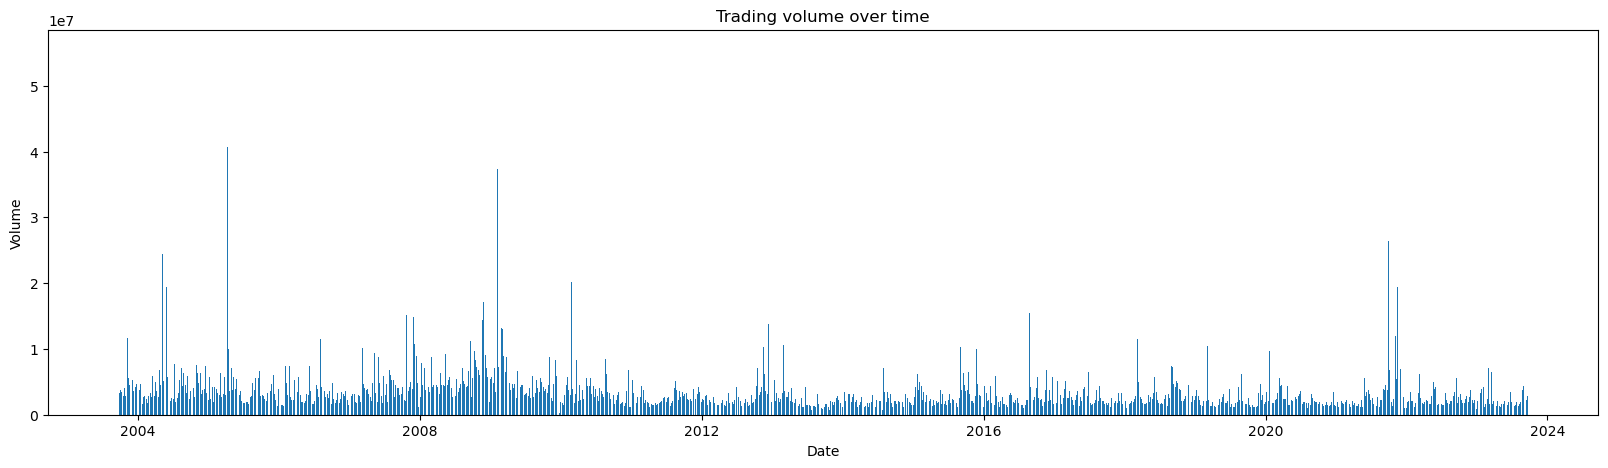

In [183]:
Tickers = ['DLTR']
options = yf.Ticker(Tickers[0]).option_chain()
OptC = options.calls
OptP = options.puts
S = sdata(Tickers[0], twenty, today)
V = vdata(Tickers[0], twenty, today)

SS = seasonality(S)
SSM = seasonmax(SS)

VS = seasonality(V)
VSM = seasonmax(VS)



fig = plt.figure(figsize = (20,5))
plt.bar(V.index, V, width = 1)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading volume over time")
plt.show()

#for hver dag i dataserien
#for hvert interval 1 til 120
#hvis stockprice < MMA[1] til MMA[120].
#hvor mange dage skal der så gå, før stockprice igen er > MMA[1] til MMA[120]?
#hvis stockprice > MMA[1] til MMA[120]
#hvor mange dage skal der så gå, før stockprice igen er < MMA[1] til MMA[120]?



down-short
up-long
short mr-time: 17.11904761904762
long mr-time: 32.0

The stockprice process is: 
Non-stationary
Non-stationary
 

The stockprice returns are: 
Stationary
Stationary
 
               min          25          50          75         max  \
Stock    84.540001  107.775002  137.169998  149.144997  174.080002   
Returns  -0.144228   -0.009290    0.000404    0.010731    0.218654   

               Mean        STD    Variance      Skew   Kurtosis  
Stock    130.081550  24.214277  586.331200 -0.164088   1.704006  
Returns    0.000608   0.023161    0.000536  1.071765  24.932353  


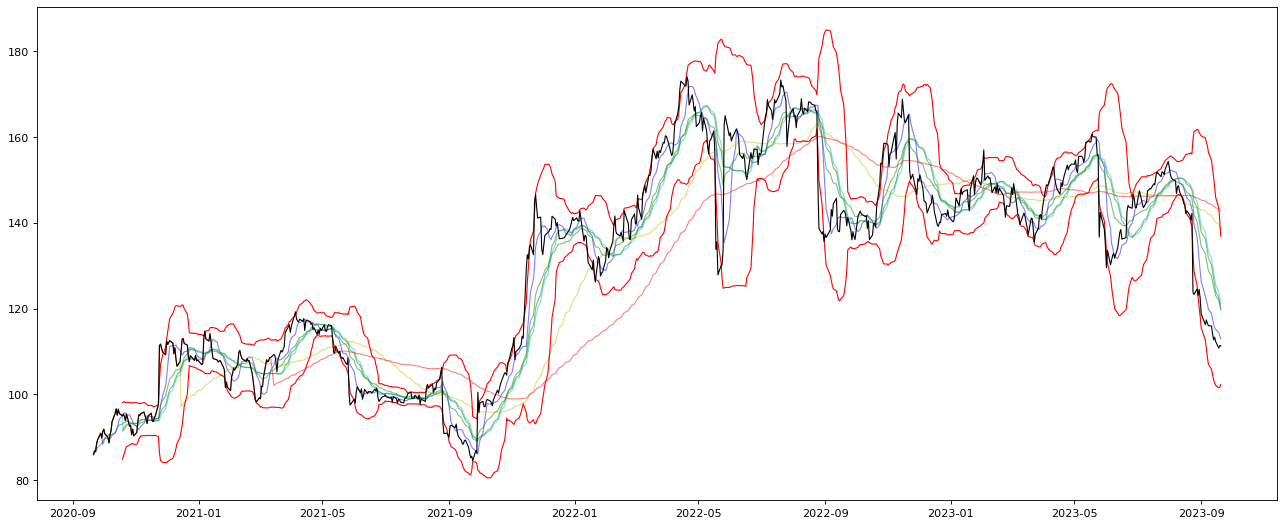

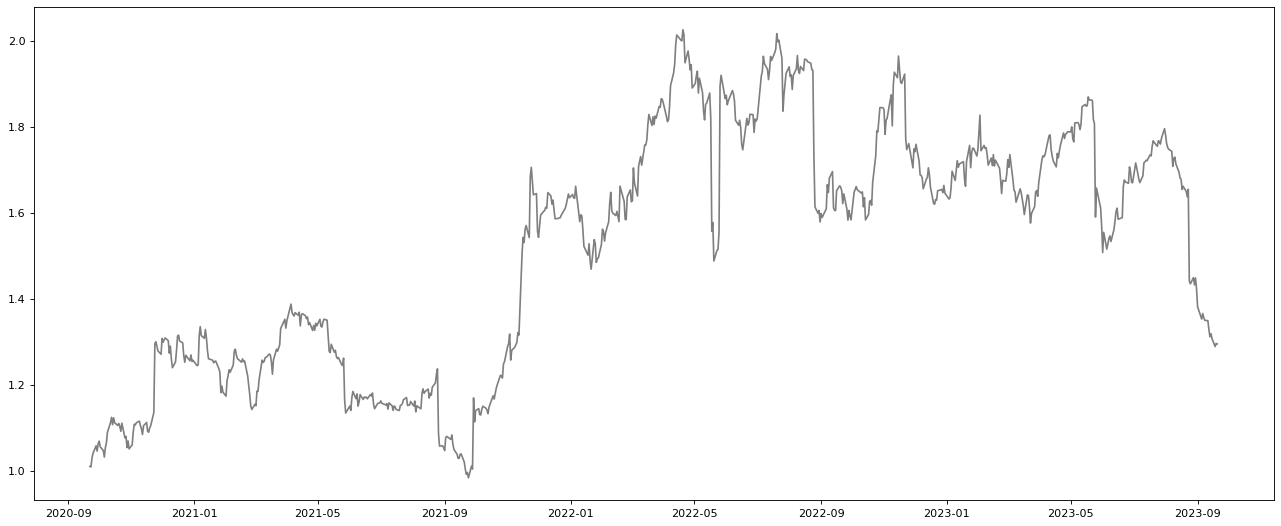

C:\Users\Mark Brezina\AppData\Local\Temp\ipykernel_4740\1826506066.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[i][1] = round(k/len(data),5)


              89.017    93.494    97.971    102.448   106.925   111.402  \
Frequencies  13.00000  30.00000  31.00000  79.00000  21.00000  67.00000   
Percentages   0.01722   0.03974   0.04106   0.10464   0.02781   0.08874   

              115.879   120.356  124.833  129.310   133.787  138.264  \
Frequencies  39.00000  23.00000  6.00000   8.0000  22.00000  53.0000   
Percentages   0.05166   0.03046  0.00795   0.0106   0.02914   0.0702   

              142.741   147.218   151.695  156.172   160.649   165.126  \
Frequencies  81.00000  59.00000  65.00000  45.0000  38.00000  28.00000   
Percentages   0.10728   0.07815   0.08609   0.0596   0.05033   0.03709   

              169.603   174.080  
Frequencies  35.00000  10.00000  
Percentages   0.04636   0.01325  
 
 
 


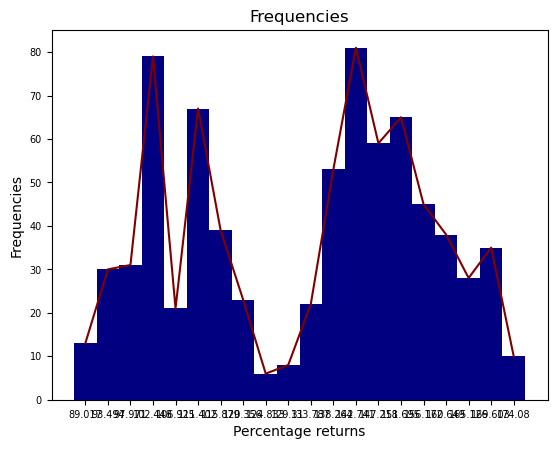

In [185]:
Stocks20y = pd.DataFrame()
Stocks10y = pd.DataFrame()
Stocks5y = pd.DataFrame()
Stocks3y = pd.DataFrame()
Stocks1y = pd.DataFrame()
for x in Tickers:
    Stocks20y[x] = sdata(x,twenty,today)
    Stocks10y[x] = sdata(x,ten,today)
    Stocks5y[x] = sdata(x,five,today)
    Stocks3y[x] = sdata(x,three,today)
    Stocks1y[x] = sdata(x,one,today)
    
    data = Stocks3y[x]
    data.describe()
    MA = smafull(data)
    r = returns(data)
    sforecast(MA)
    print("\nThe stockprice process is: ")
    station1(data)
    station2(data)
    print(" ")
    print("\nThe stockprice returns are: ")
    station1(r)
    station2(r)
    print(" ")
    s = sstat(data,"Stock")
    rs = pd.DataFrame(r)
    rs = sstat(r,"Returns")
    s = pd.concat([s,rs])
    print(s)
    
    m = pd.DataFrame()
    m['Actual'] = Stocks3y[x]
    m['Returns'] = r
    m['SMA'] = sma(Stocks3y[x])
    m['EMA'] = ema(Stocks3y[x])
    m['VOLIT'] = volatility(Stocks3y[x])
    m['Lower'] = bollinger(Stocks3y[x])['Lower']
    m['Upper'] = bollinger(Stocks3y[x])['Upper']
        
    plt.figure(figsize=(20, 8), dpi=80)
    plt.plot(MA.index, MA['MMA7'], color = 'b', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA21'], color = 'c', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA60'], color = 'y', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA120'], color = 'r', alpha = 0.5, lw=1)
    plt.plot(m.index, m['SMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['EMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['Lower'], color = 'r', alpha = 1, lw=1)
    plt.plot(m.index, m['Upper'], color = 'r', alpha = 1, lw=1)
    plt.plot(MA.index, MA['Stockprice'], color = 'k', alpha = 1, lw=1)
    plt.show()
    
    plt.figure(figsize=(20, 8), dpi=80)
    plt.plot((returns(MA['Stockprice']) + 1).cumprod(), color = 'k', alpha = 0.5)
    plt.show()
    
    
    freq = frequencies(Stocks3y[x],20, True)
    print(freq)
    
    print(" ")
    print(" ")
    print(" ")
    

In [48]:
from scipy import stats
data = Stocks1y[x][len(Stocks1y[x])-30:len(Stocks1y[x])]

bres = stats.beta.fit(data)
nres = stats.norm.fit(data)
brres = stats.burr.fit(data)
bires = stats.binom.fit(data)

C:\Users\Mark Brezina\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


AttributeError: 'binom_gen' object has no attribute 'fit'

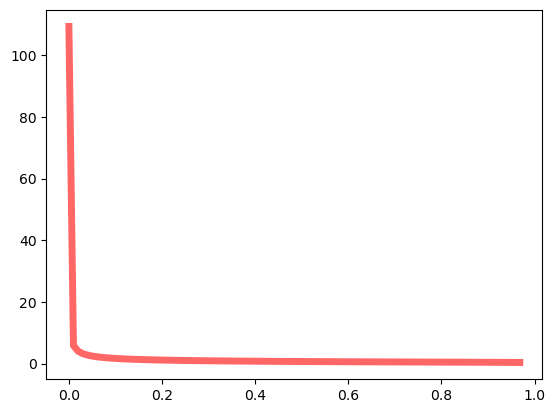

In [33]:
a = bres[0]
b = bres[1]
x = np.linspace(stats.beta.ppf(0.01, a, b),
                stats.beta.ppf(0.99, a, b), 100)
plt.plot(x, stats.beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

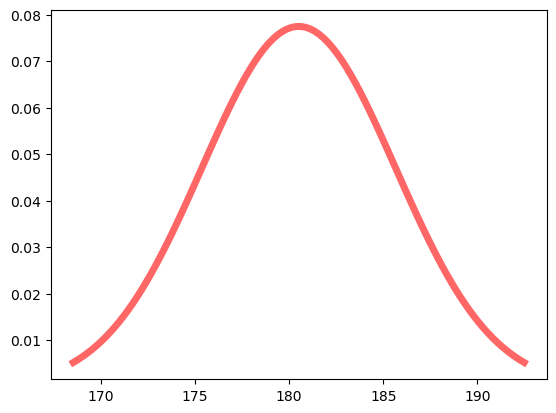

In [31]:
x = np.linspace(stats.norm.ppf(0.01, nres[0], nres[1]),
                stats.norm.ppf(0.99, nres[0], nres[1]), 100)
plt.plot(x, stats.norm.pdf(x, nres[0], nres[1]),
       'r-', lw=5, alpha=0.6, label='burr pdf')

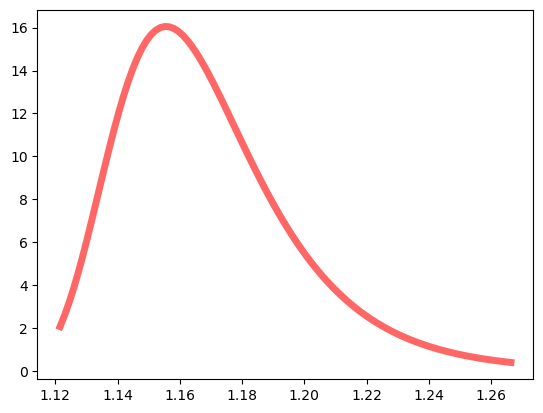

In [32]:
x = np.linspace(stats.burr.ppf(0.01, brres[0], brres[1]),
                stats.burr.ppf(0.99, brres[0], brres[1]), 100)
plt.plot(x, stats.burr.pdf(x, brres[0], brres[1]),
       'r-', lw=5, alpha=0.6, label='burr pdf')

In [34]:
def f1(x):
    return model.intercept_ + x*model.coef_[1]

def f2(x):
    res = 0
    if len(results.params) <= 2:
        res = results.params[0] + results.params[1] *x   
    elif len(results.params) == 3:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2
    elif len(results.params) == 4:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2 + results.params[3] * x**3
    elif len(results.params) == 5:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2 + results.params[3] * x**3 + results.params[4] * x**4
    return res


In [49]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = sdata("AAPL", three, today)
data = data.fillna(np.mean(data))
data[abs(data[0:]) < 0.01] = 0.01
df_all = pd.DataFrame()
df = pd.DataFrame()
df_all['Close'] = data
df_all['Diff']=df_all['Close']-df_all['Close'].shift(1)
df_all['LogClose']=np.log(abs(df_all['Close']))
df_all['LogDiff']=df_all['LogClose']-df_all['LogClose'].shift(1)
df=df_all[1:]
ts=df[['Close']]

resid = []
for n in range(12):
    residualer = []
    start = n*20 + 1
    end = (n+1)*20
        
    for i in range(start, end):
        x = np.array(range(2)).reshape((-1,1))
        y = np.array([data[i], data[i-1]])

        polynomial_features= PolynomialFeatures(degree=(4))
        xp = polynomial_features.fit_transform(x)
        xp.shape
        results = sm.OLS(y, xp).fit()

        x_ = PolynomialFeatures(degree=(1)).fit_transform(x)
        model = LinearRegression().fit(x_, y)

        r_sq = round(model.score(x_, y),3)
        model.intercept_
        model.coef_
        #print(f"SKlearn coefficient of determination: {r_sq}, if below 0.9, than it's bad")
        #print(f"SKlearn intercept: {model.intercept_}")
        #print(f"SKlearn slope: {model.coef_}")

        #print(f"Statsmodels coefficient of determination: {results.rsquared}, if below 0.9, than it's bad")
        #print(f"Statsmodels intercept: {results.params[0]}")
        #print(f"Statsmodels slope: {results.params}")

        xplot = np.linspace(0,2,10)
        yplot = []
        y2plot = []
        for j in range(len(xplot)):
            yplot.append(f1(xplot[j]))
            y2plot.append(f2(xplot[j]))

        residualer.append([(yplot[-1] - data[i+1]), (y2plot[-1] - data[i+1])])
    residualer = pd.DataFrame(residualer)
    residualer.columns = ["Linear","4D poly."]
    resid.append([ (np.mean(residualer["Linear"])/np.mean(data[start:end])), (np.mean(residualer["4D poly."])/np.mean(data[start:end]))  ])
    print("Month",n+1,", Linear",resid[n][0]*100,"%, 4D poly.", resid[n][1]*100,"%")
    
print(" ")
pm = 0
lm = 0
for i in range(len(resid)):
    pm = pm + resid[i][1]
    lm = lm + resid[i][0]
pm = pm/len(resid)
lm = lm/len(resid)
print("Mean of all linear residuals",lm,"\nMean of all Polynomial residuals", pm)

Month 1 , Linear -0.5629833946510423 %, 4D poly. -0.975664803607238 %
Month 2 , Linear 0.7078907241821677 %, 4D poly. 2.0827700388870203 %
Month 3 , Linear -1.0282520504561683 %, 4D poly. -2.833989563936838 %
Month 4 , Linear -0.5546751241290496 %, 4D poly. -1.0533944993348567 %
Month 5 , Linear -0.7001071587687937 %, 4D poly. -2.095469460404641 %
Month 6 , Linear 2.1009683264558836 %, 4D poly. 5.561022152121438 %
Month 7 , Linear -1.043527545761392 %, 4D poly. -3.3060845981419638 %
Month 8 , Linear -0.4993067613414553 %, 4D poly. -1.8778439904474067 %
Month 9 , Linear 0.3971946914173349 %, 4D poly. 1.165919414989811 %
Month 10 , Linear -1.4542261149949531 %, 4D poly. -3.9609011852363465 %
Month 11 , Linear -0.8855629450781463 %, 4D poly. -2.4858144051210687 %
Month 12 , Linear -0.2772884734969784 %, 4D poly. -0.853634710904966 %
 
Mean of all linear residuals -0.0031665631888521603 
Mean of all Polynomial residuals -0.008860904675947546


In [307]:
lst = data.values.tolist()
for _ in range(3):
    lst.append(data.tail(1)[0])

In [52]:
data = sdata("AAPL", one, today)
data = data.fillna(np.mean(data))
df_all = pd.DataFrame()
df_all['Close'] = data
df_all['Diff']=df_all['Close']-df_all['Close'].shift(1)
df_all['LogClose']=np.log(df_all['Close'])
df_all['LogDiff']=df_all['LogClose']-df_all['LogClose'].shift(1)
df_all=df_all[1:]

diff=df_all[['Diff']]
diff = diff.fillna(0)

ts=df_all[['Close']]

tsf=ts.asfreq('b');
tsf[tsf.isnull().any(axis=1)];
tsf.ffill(inplace=True);
tsf.index = pd.to_datetime(tsf.index).tz_localize(None)

ts_dec=seasonal_decompose(tsf,  extrapolate_trend = 'freq')
tst = pd.DataFrame(ts_dec.trend)
tsr = pd.DataFrame(ts_dec.resid)

ts_rest=tsf['Close']
N=int(len(ts_rest)    )
sample_rate=500 # Hertz=cycles per second (frequecy)
#set d (sample spacing) = inverse of the sampling rate
d=1/sample_rate
duration=  N*d  #seconds
ts_fft=fft(ts_rest.values)
ts_freq=fftfreq(N,  d)  # Return the Discrete Fourier Transform sample frequencies (sample frequency POINTS)

ts_ifft=ifft(ts_fft)
c=[*ts_ifft, *ts_ifft]
ts_denoised=tst['trend'][0:]+ts_ifft


 

             Close
count  250.000000
mean   160.427195
std     19.263536
min    124.488869
25%    145.256310
50%    155.165558
75%    177.532497
max    196.185074


NameError: name 'ts_freq' is not defined

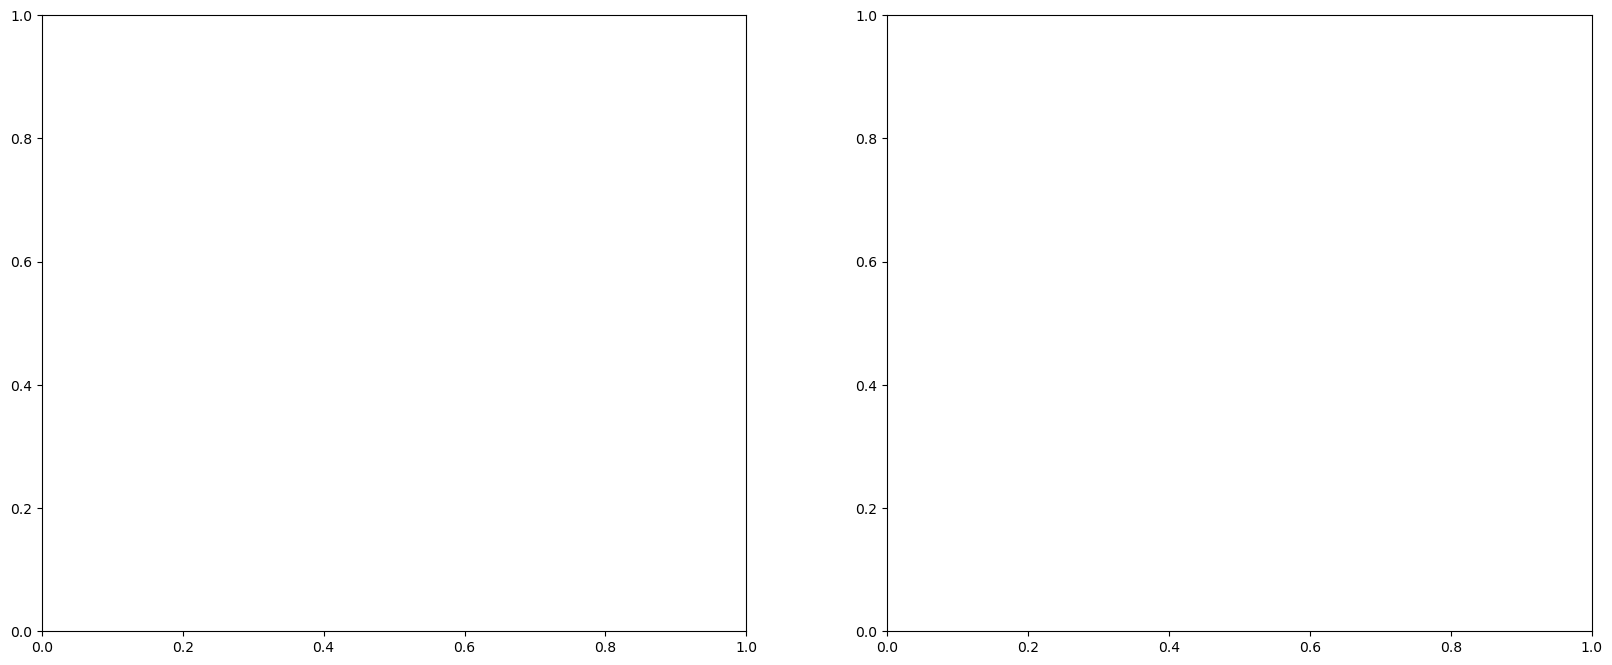

In [36]:
fig, axs = plt.subplots(figsize=(20, 8), ncols = 2, nrows = 1)
axs[0].plot(ts_freq[0:N//2] , ts_fft[0:N//2]  )
axs[1].plot(ts_rest.index, ts_ifft, color='b')
axs[1].plot(ts_rest.index, ts_rest, color='r', alpha=0.4)
plt.show()

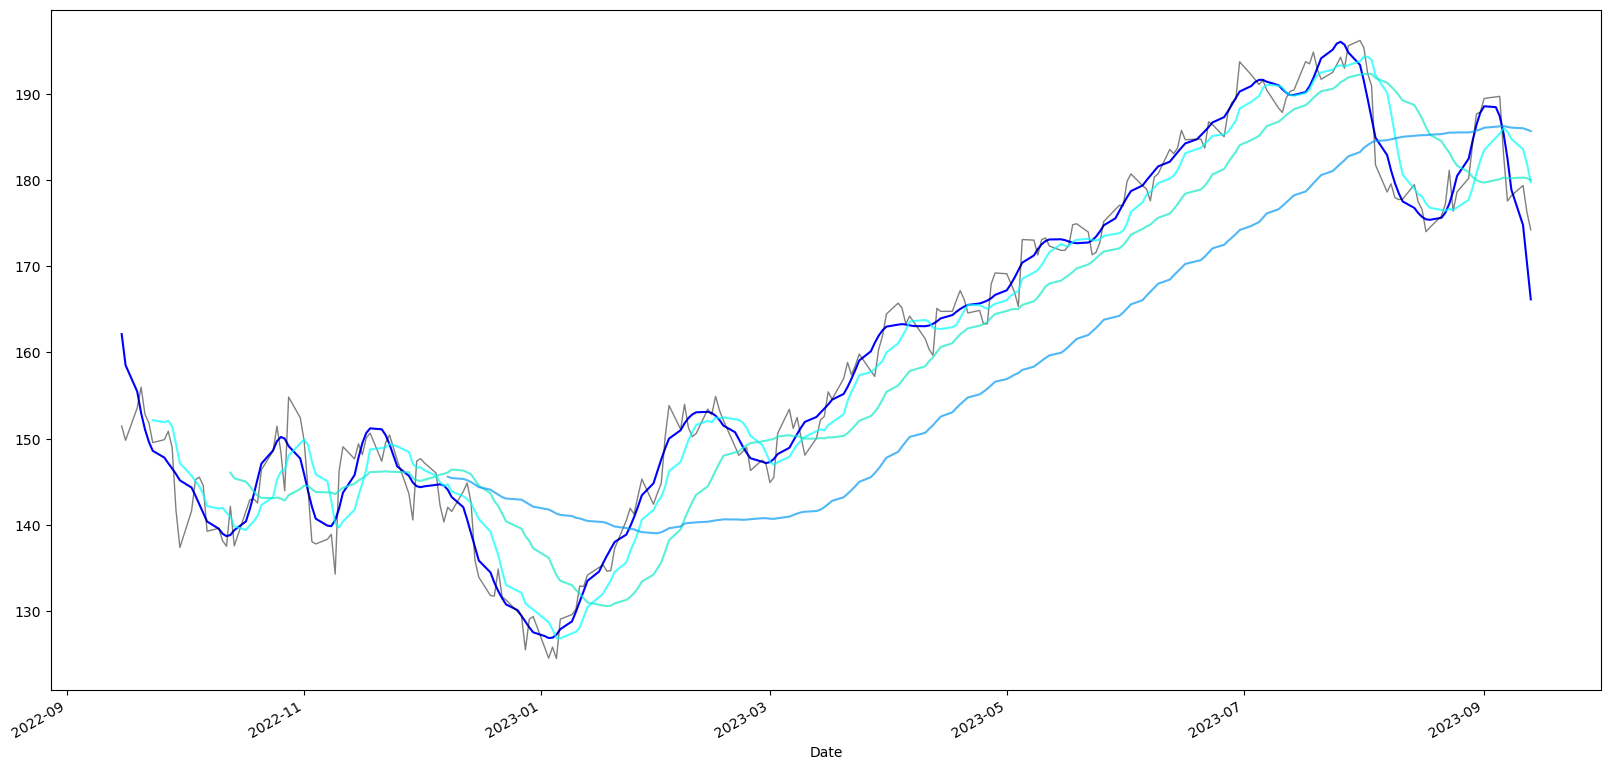

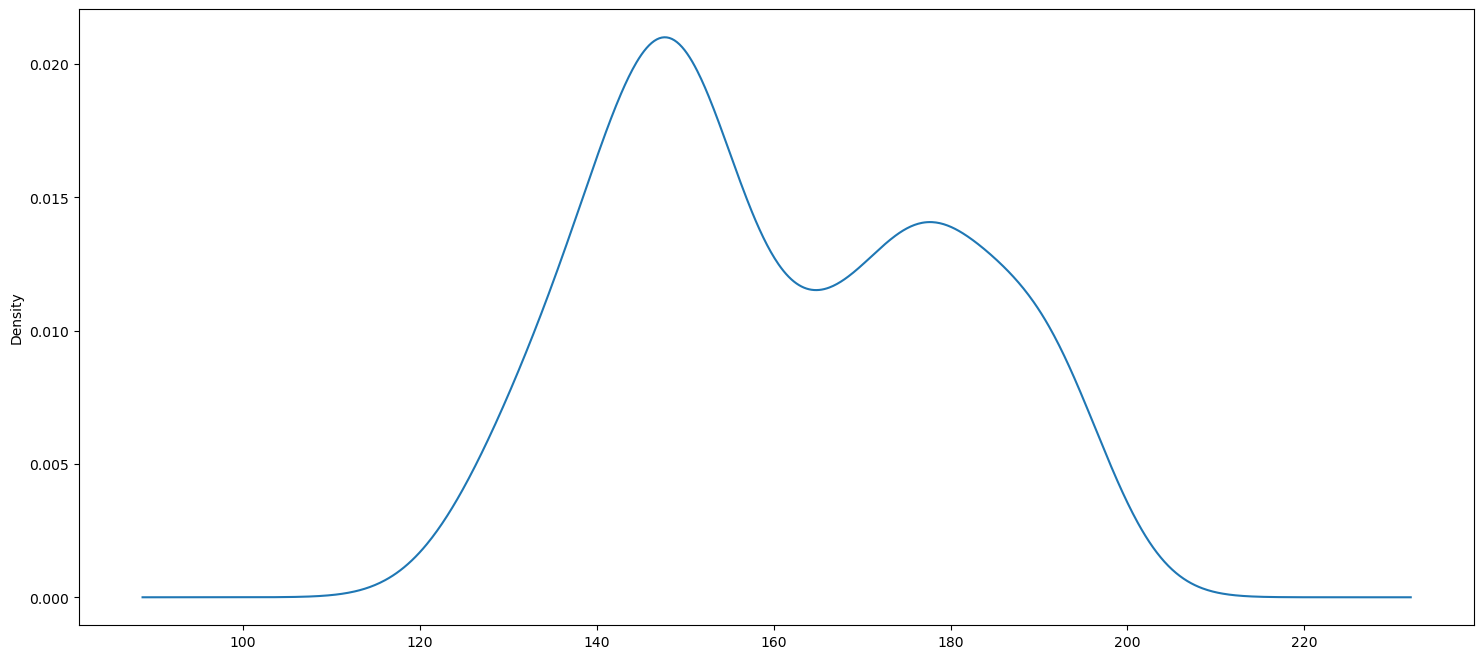

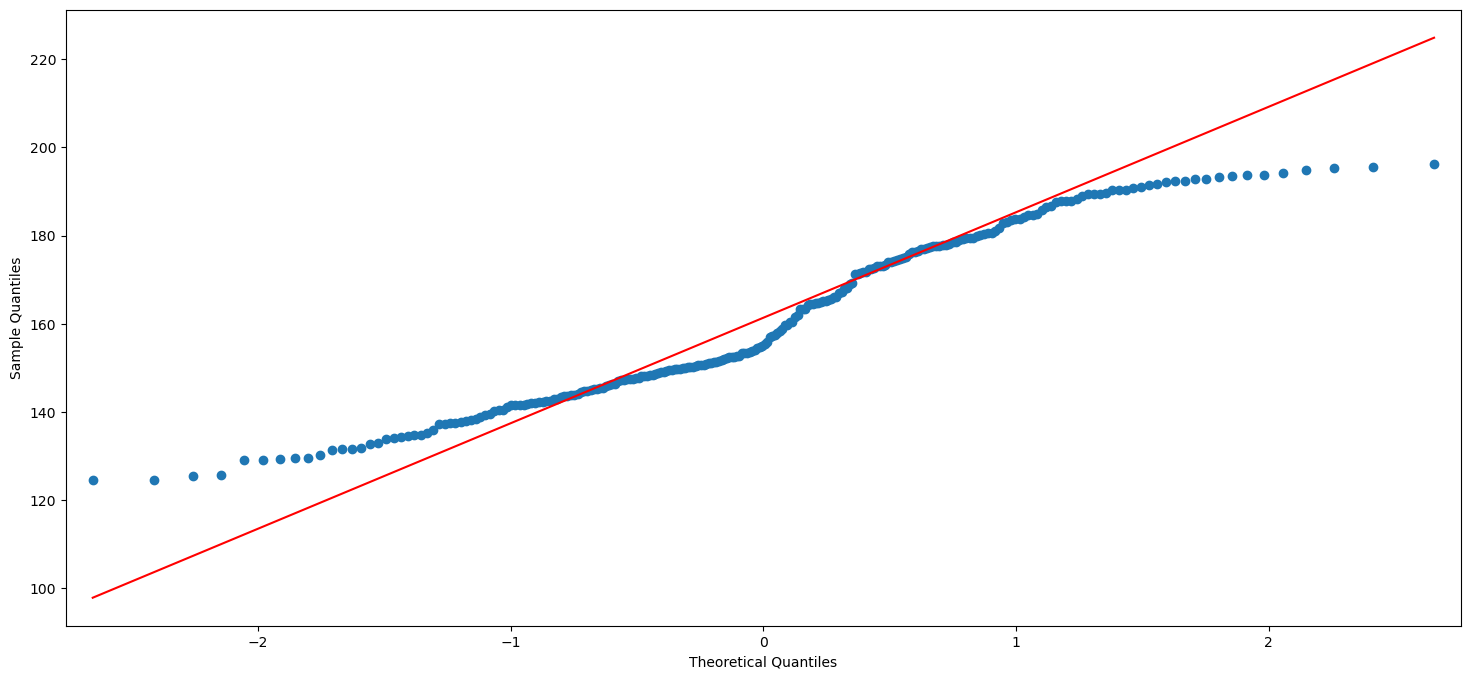

      lb_stat      lb_pvalue
1  247.332197   9.909620e-56
2  489.380162  5.400676e-107


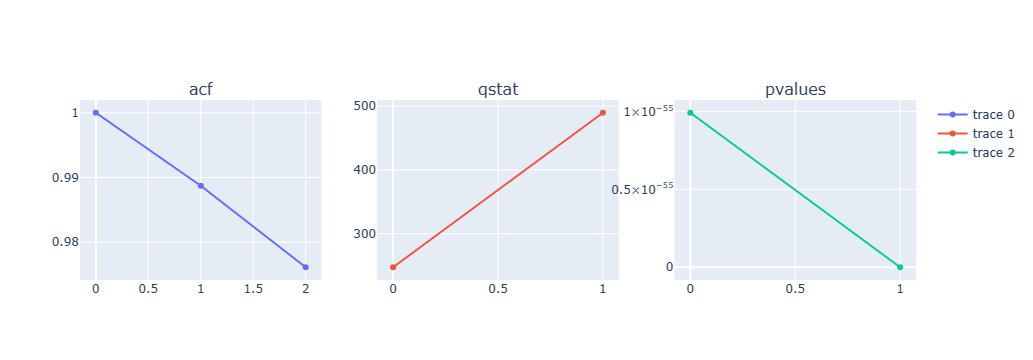

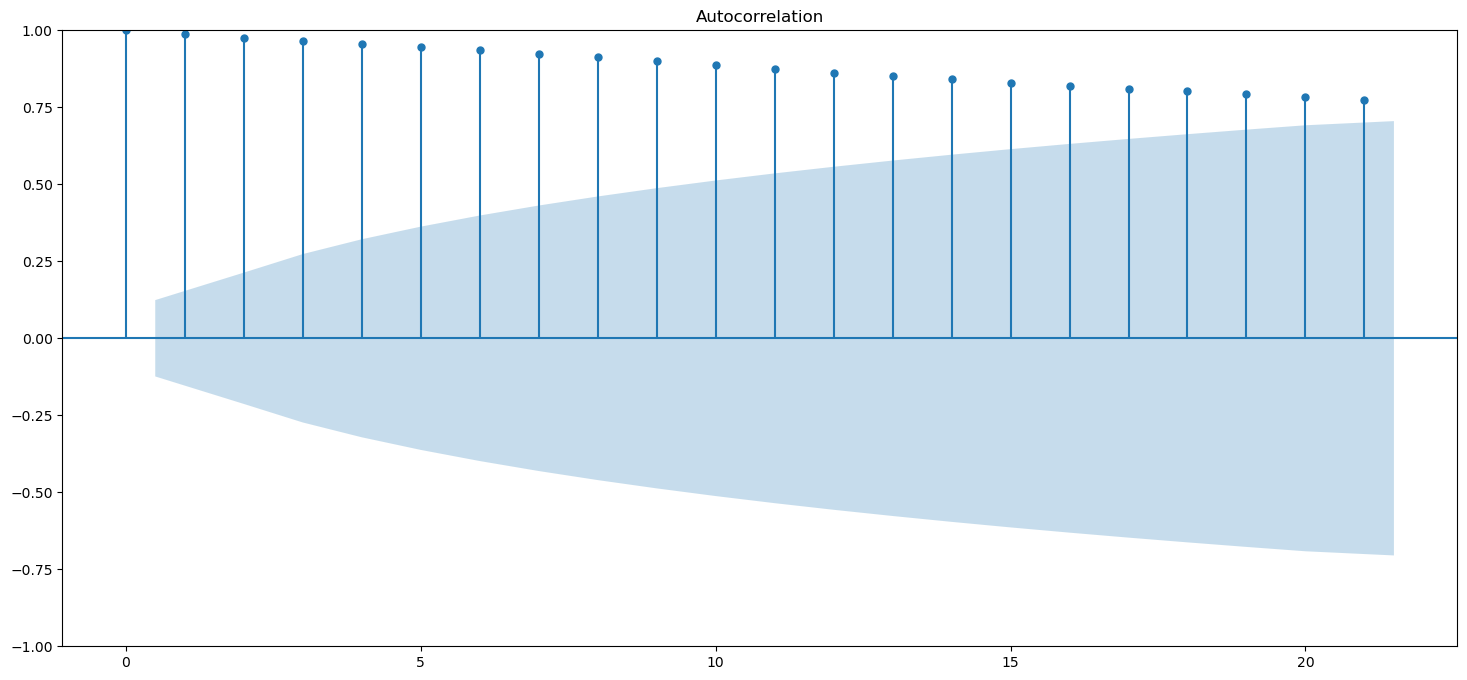

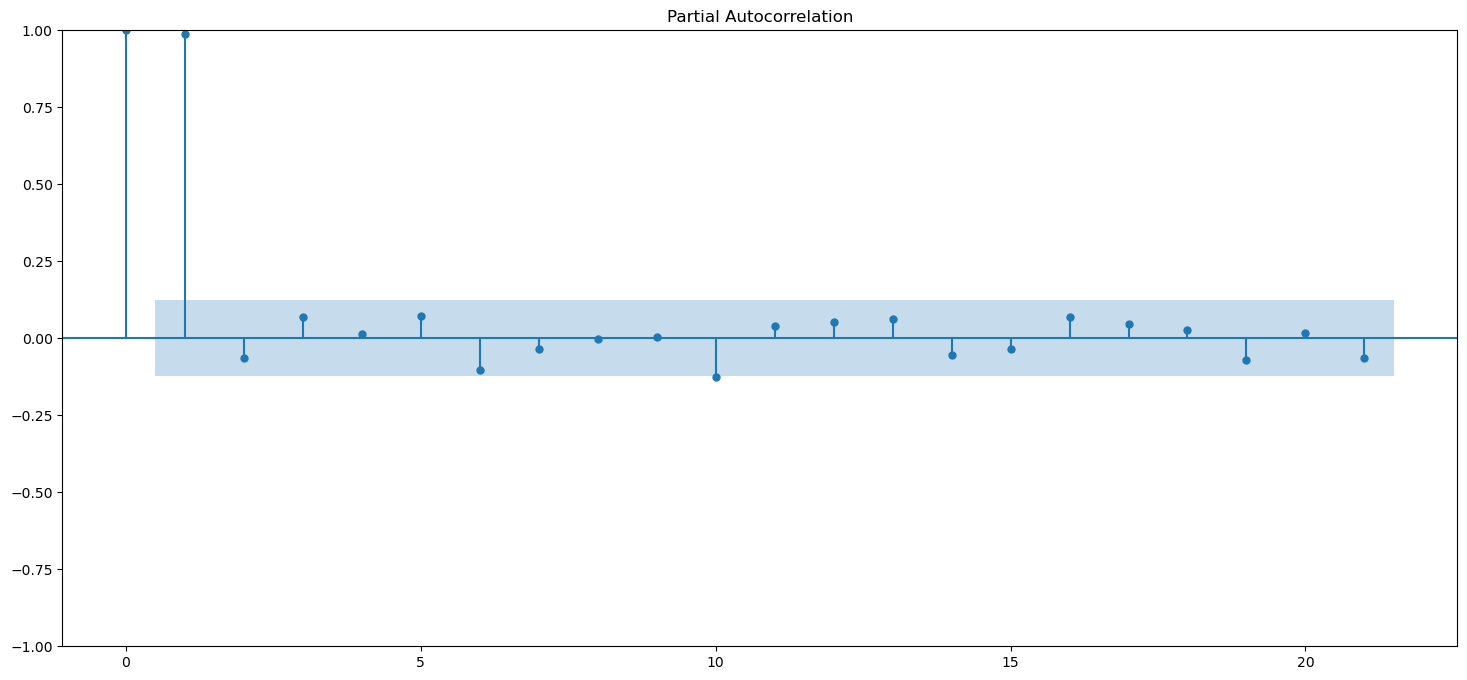

In [276]:
# for function
sma={}
for k in [7, 21, 60]:
    sma[k]=ts.rolling(k).mean()


plt.figure(figsize=(20, 10))
#plt.plot(tst, color = "r")
plt.plot(ts_rest.index, ts_ifft, color='b')
plt.plot(ts['Close'].index, ts['Close'], color='k', lw=1,  alpha=0.5)
sma[7]['Close'].plot(color='xkcd:cyan',alpha=0.7)
sma[21]['Close'].plot(color='xkcd:aqua', alpha=0.7)
sma[60]['Close'].plot(color='xkcd:azure',alpha=0.7)
plt.show()

from scipy import stats
df_all['Close'].plot(kind = "kde")
sm.qqplot(df_all['Close'], line='q')
plt.show()

x = np.asarray(df_all['Close'])
plot_acf(x, lags=21)
plot_pacf(x, lags=21)

lag = 2
from statsmodels.api import stats
print(stats.acorr_ljungbox(x, lags=lag, return_df=True))
res_acf = stattools.acf(x, fft=True, qstat=True, nlags=lag)
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("acf", "qstat", "pvalues"))
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[0]))],y=res_acf[0]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[1]))], y=res_acf[1]),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[2]))],y=res_acf[2]),
    row=1, col=3
)





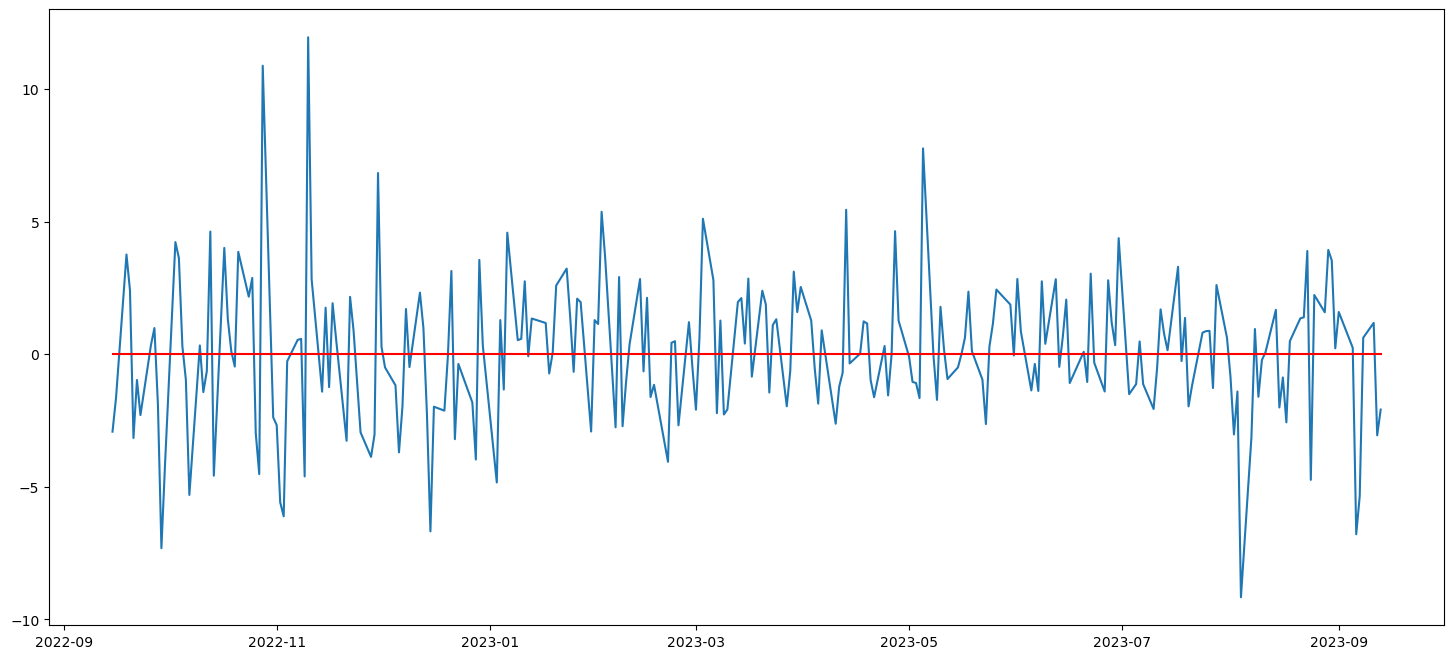

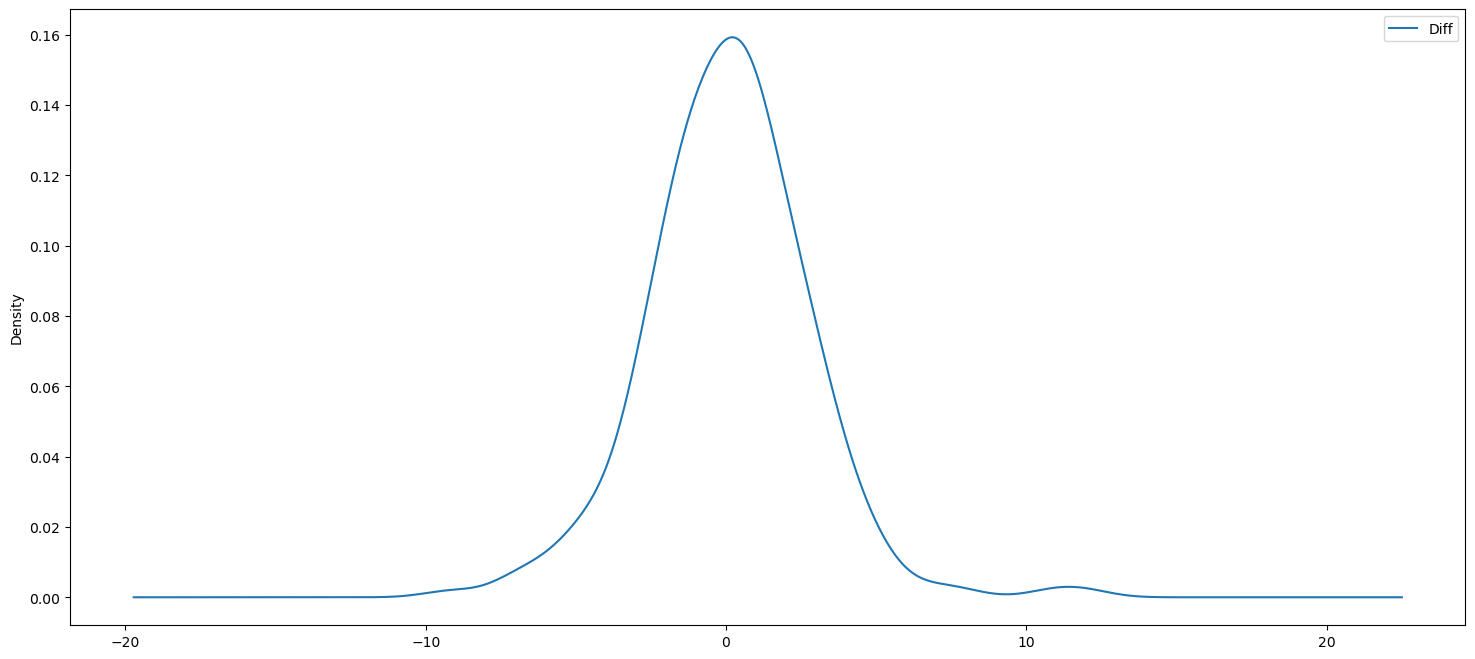

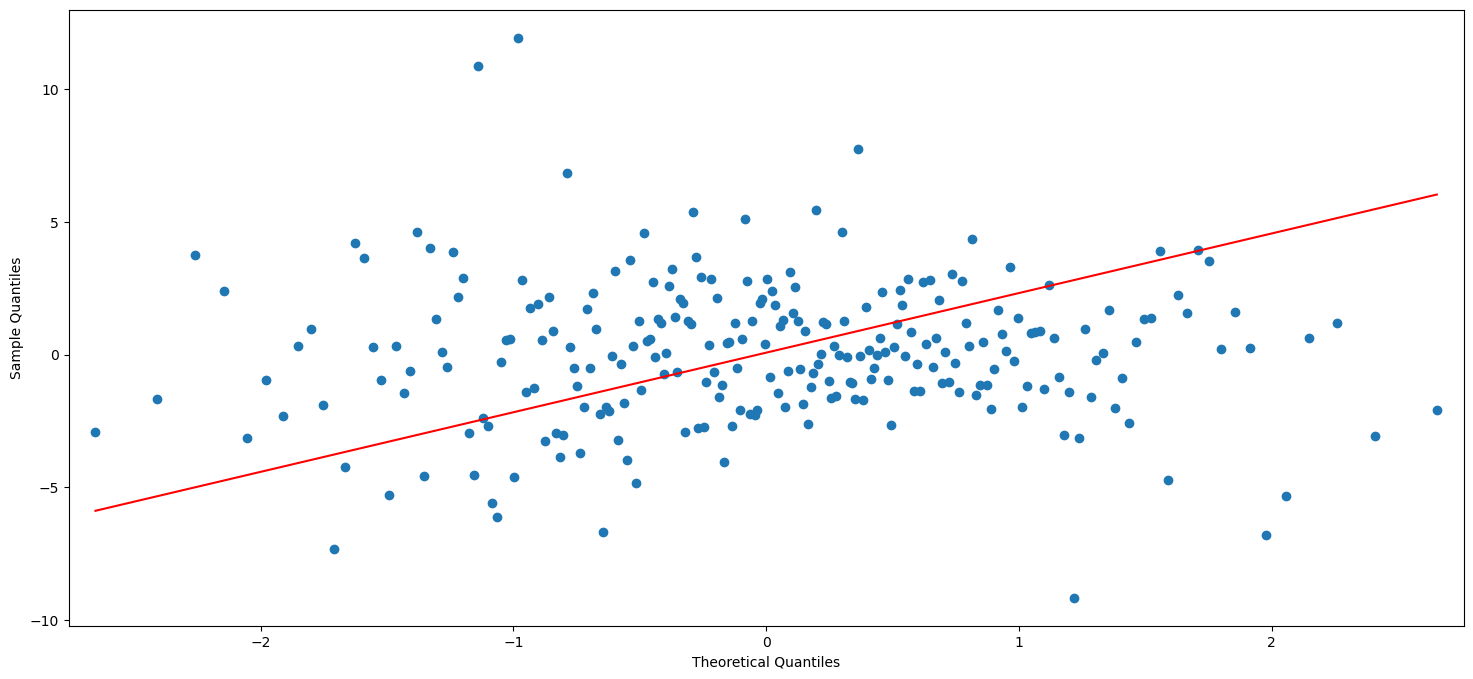

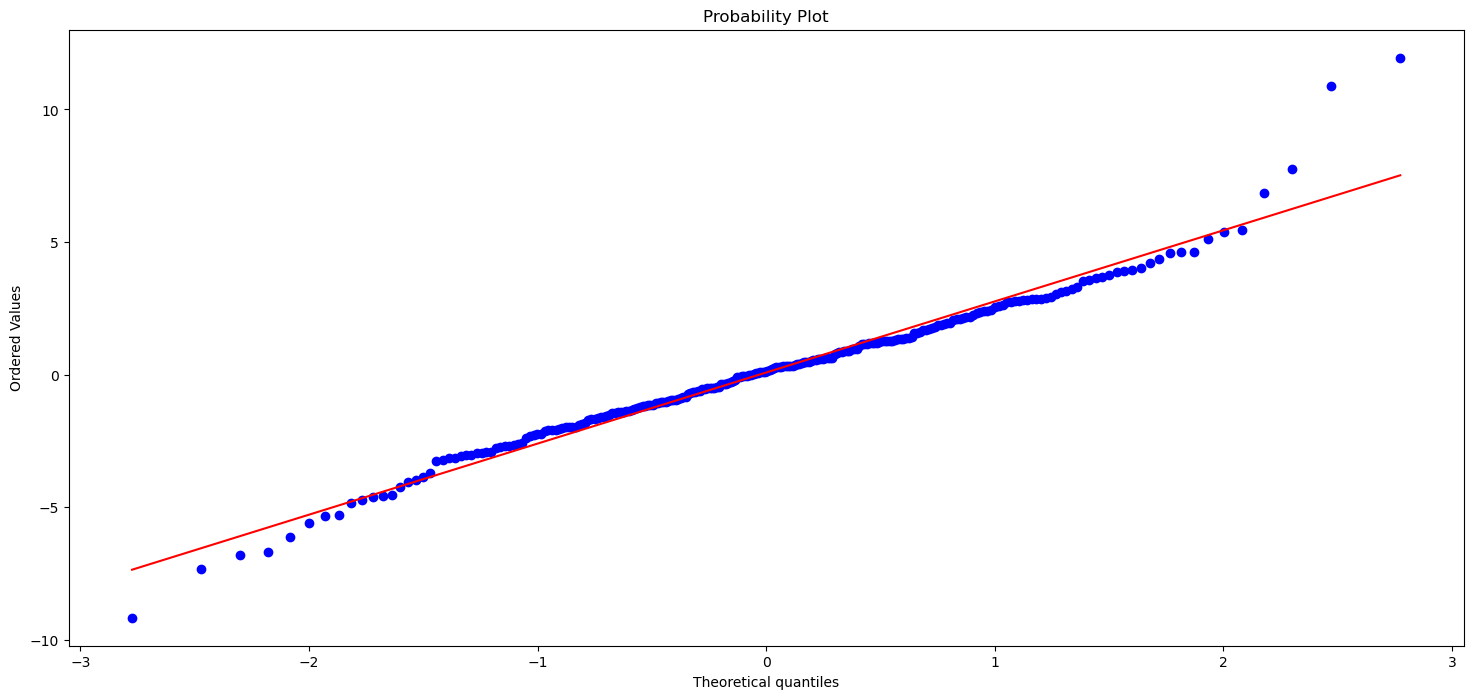

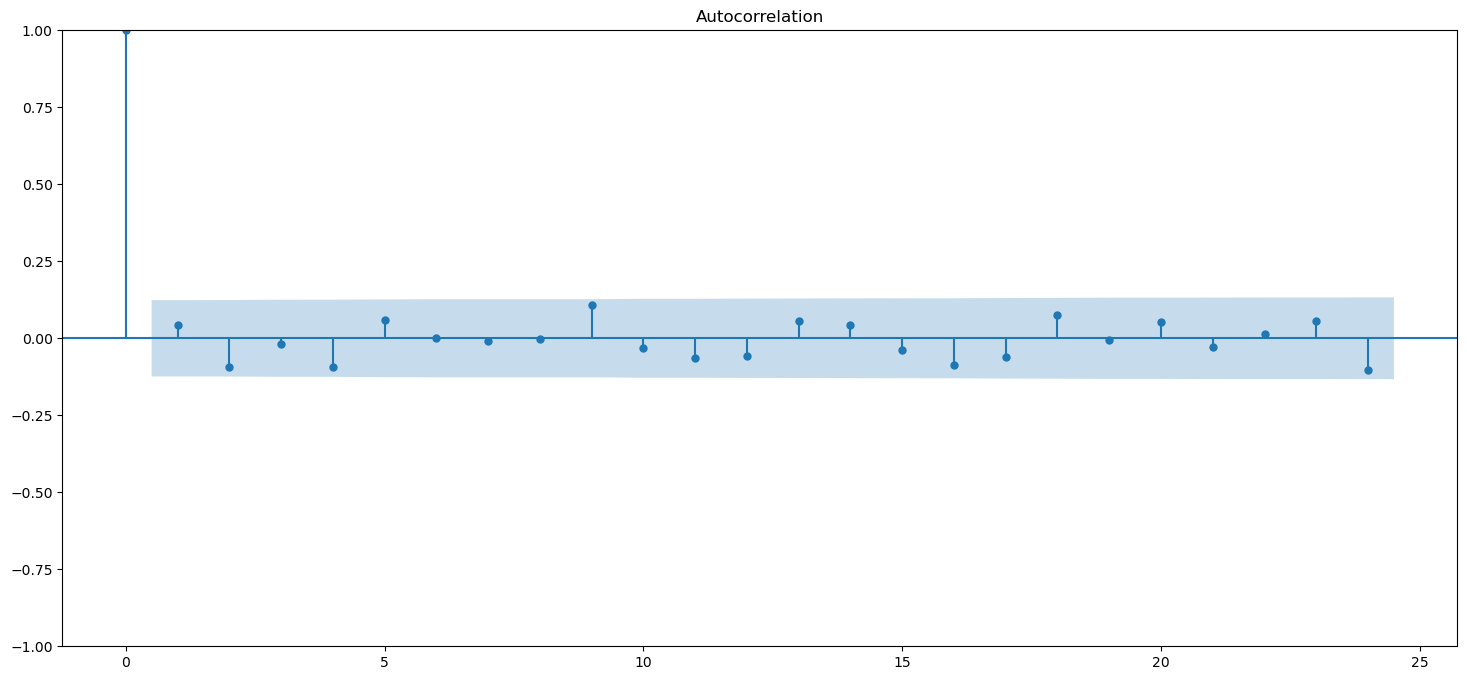

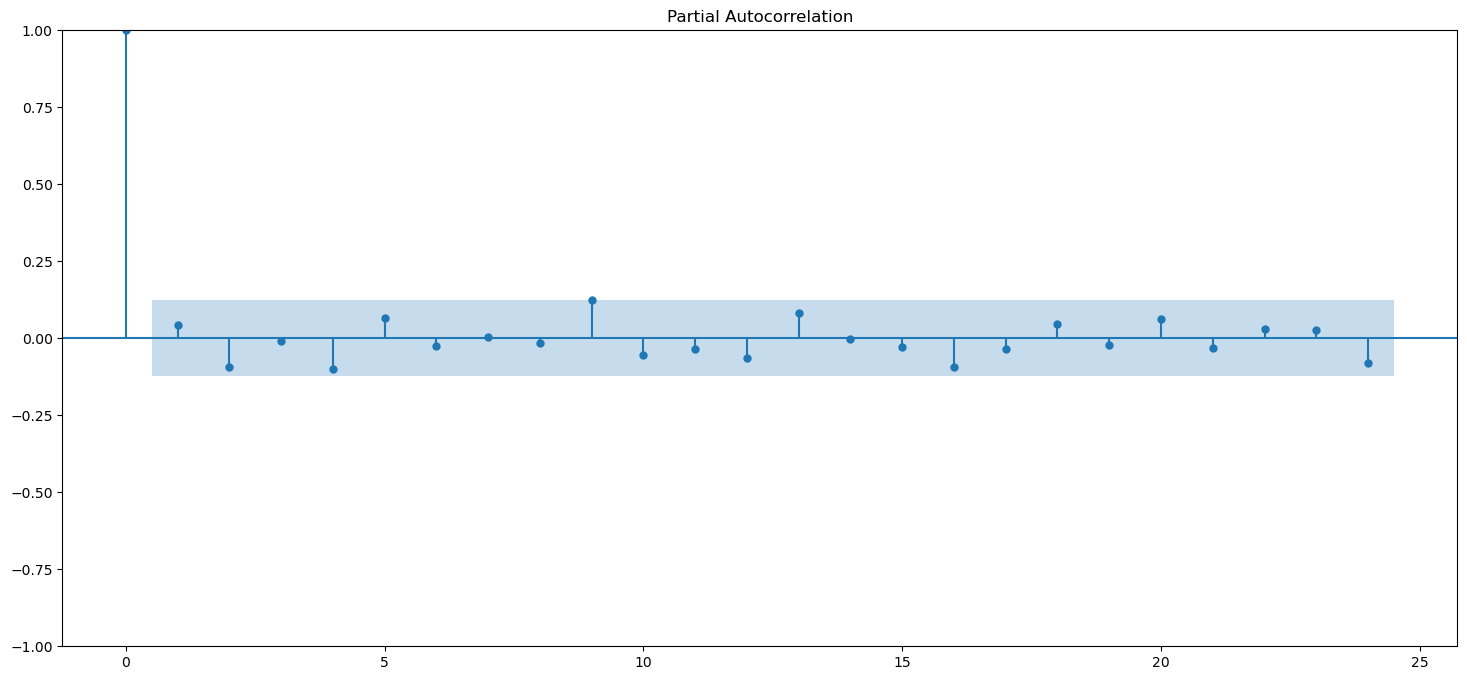

In [283]:
# for returns (function diffs)
plt.plot(diff.index, diff['Diff'])
plt.plot(diff.index,np.zeros(len(diff)),color = 'r')
plt.show()
diff.plot(kind = "kde")
plt.show()
from scipy import stats
sm.qqplot(diff, line='q');
plt.figure('QQ plot');
stats.probplot(diff['Diff'], plot=plt);
plt.show()
plot_acf(diff)
plot_pacf(diff);

In [284]:
#x = arima_process.arma_generate_sample(ar=[0.5, -0.25, -0.2], ma=[2], nsample=1000)

model1 = AutoReg(x, lags=2, old_names=False).fit()
model1 = ARIMA(endog=x, order=(1,1,1), trend='n').fit()
#model.summary()

n_test = 10
train, test = ts[:-n_test], ts[-n_test:]

model2 = arch_model(ts, mean='Zero', vol='ARCH', p=1).fit()
model3 = arch_model(ts, mean='Zero', vol='GARCH', p=1, q=1).fit()
model4 = arch_model(ts, vol='Garch', p=1, o=0, q=1, dist='Normal').fit()
#res = model.fit(disp='off')
yhat = model4.forecast(horizon=3)

#forecast_vol = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

#1: Perfect positive correlation. The variables tend to move in the same direction 
#(i.e., when one variable increases, the other variable also increases).

#0: No correlation. The variables do not have a relationship with each other.

#-1: Perfect negative correlation. The variables tend to move in opposite directions 
#(i.e., when one variable increases, the other variable decreases).

Iteration:      1,   Func. Count:      4,   Neg. LLF: 1622.4826812694532
Iteration:      2,   Func. Count:      6,   Neg. LLF: 1622.4826812703648
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1622.4826812694532
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      5,   Neg. LLF: 1622.5488467338846
Iteration:      2,   Func. Count:      9,   Neg. LLF: 1622.7127592798283
Iteration:      3,   Func. Count:     14,   Neg. LLF: 1622.4832911160947
Iteration:      4,   Func. Count:     18,   Neg. LLF: 1622.4824576339652
Iteration:      5,   Func. Count:     22,   Neg. LLF: 1622.4824255684325
Iteration:      6,   Func. Count:     25,   Neg. LLF: 1622.482425568494
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1622.4824255684325
            Iterations: 6
            Function evaluations: 25
            Gradient evaluations: 6
It

C:\Users\Mark Brezina\anaconda3\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




In [ ]:
import gs_quant
help(gs_quant)

import EnvisionRiskRaaS as RaaS
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import queuelib

df = pd.read_csv('FF.CSV', sep = ",")
from datetime import datetime, timedelta
for i in range(len(df)):
    s = str(df['Date'][i])
    df['Date'][i] = datetime(year=int(s[0:4]),month=int(s[4:6]), day=int(s[6:8]))
# 1. FF Factors' monthly returns
factors = pd.DataFrame(df)
factors.set_index("Date", inplace=True)
#convert index column to datetime format
factors.index = pd.to_datetime(factors.index)

mkt_return = factors["Mkt-RF"] + factors["RF"]  # get mkt return by ading back risk free to excess return
mkt_return.name = "Mkt"
mkt_return.head()

dfr = pd.read_csv('49P.CSV', sep = ",")
dfr
from datetime import datetime, timedelta
for i in range(len(dfr)):
    s = str(dfr['Date'][i])
    dfr['Date'][i] = datetime(year=int(s[0:4]),month=int(s[4:6]), day=int(s[6:8]))
# 1. FF Factors' monthly returns
returns = pd.DataFrame(dfr)
returns.set_index("Date", inplace=True)
#convert index column to datetime format
returns.index = pd.to_datetime(returns.index)
returns

# Merge datasets
data = pd.concat([returns, mkt_return], axis=1)
data.head()

full_covmat = data.cov()
full_covmat.head()

betas = full_covmat["Mkt"].drop("Mkt") / full_covmat.loc["Mkt", "Mkt"]  # extract cov and mkt var

# Mkt neutral portfolio
covmat = data.drop(columns=["Mkt"]).cov()  # we need to drop mkt figures from the vcv matrix
num_weights = covmat.shape[1]  # number of constituents
x = cvx.Variable(num_weights)  # the variable that is allowed to change in the optimization function
port_var = cvx.QuadForm(x, covmat)  # portfolio variance
objective = cvx.Minimize(port_var)  # the objective function to be minimized

# Constraints on concentration
lower_bound = -1.0
upper_bound = 1.0

constraints = [x >= lower_bound,
               x <= upper_bound,
               sum(x) == 1,
               x.T @ betas == 0.0]

# solving the objective
problem = cvx.Problem(objective, constraints)
problem.solve()

#x = x.value
#x = pd.Series(x)  

#y = []
#for i in range(len(betas)):
    #y.append(betas[i] * x[i])
#y


# Convert to Pandas to ease of read
w = pd.Series(y, index=covmat.columns)


#get_mkt_neutral_weights(covmat, betas)
def get_mkt_neutral_weights(covmat, mkt_betas, lower_bound=-1.0, upper_bound=1.0):
    num_weights = covmat.shape[1]
    x = cvx.Variable(num_weights)
    port_var = cvx.QuadForm(x, covmat)
    objective = cvx.Minimize(port_var)

    constraints = [x >= lower_bound,
                   x <= upper_bound,
                   sum(x) == 1,
                   x.T @ mkt_betas == 0.0]

    # solving the objective
    problem = cvx.Problem(objective, constraints)
    problem.solve()
    x = x.value
    
    return x

#covmat = data.drop(columns=["Mkt"]).cov()  # we need to drop mkt figures from the vcv matrix

roll_covmat = data.rolling(window=12).cov().dropna()
roll_covmat

# Rolling optimization
date_list = set(roll_covmat.index.get_level_values("Date"))
weights = pd.DataFrame(index=pd.Index(date_list).sort_values(), columns = returns.columns)
betas = pd.DataFrame(index=pd.Index(date_list).sort_values(), columns = returns.columns)
for date in date_list:
    # print("Optimizing weights at time ", date)
    tmp_full_cov = roll_covmat.loc[date]
    tmp_cov = tmp_full_cov.drop("Mkt").drop(columns=["Mkt"])
    tmp_betas = tmp_full_cov["Mkt"].drop("Mkt") / tmp_full_cov.loc["Mkt", "Mkt"]

    weights.loc[date, :] = get_mkt_neutral_weights(tmp_cov, tmp_betas)
    betas.loc[date, :] = tmp_betas
    
print(len(tmp_full_cov))
print(len(tmp_cov))
print(len(tmp_betas))
print(len(betas))

portfolio_beta = (weights.shift(1) * betas).dropna().sum(axis=1)
portfolio_beta.plot(figsize=(18, 8))
plt.axhline(portfolio_beta.mean(), color="red")
plt.title("Mkt Neutral Portfolio Rolling Beta to Market")

#portfolio_beta.plot(figsize=(18, 8))
#plt.axhline(portfolio_beta.mean(), color="red")
#plt.title("Mkt Neutral Portfolio Rolling Beta to Market")


#portfolio_ret = (weights.shift(1) * returns).dropna().sum(axis=1)
#(1 + portfolio_ret).cumprod().plot(figsize=(18, 8), label="Mkt Neutral Portfolio")
#(1 + data.loc[portfolio_ret.index].Mkt).cumprod().plot()
#plt.grid()
#plt.legend()
#plt.title("Backtest of Market Neutral Portfolio Return")

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sa
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, date, timedelta, timezone
import yfinance as yf
from scipy import integrate
import random
import pandas_ta as ta
from numpy.linalg import inv
from numpy import array, dot, mean, std, hstack, asarray, exp, random
from scipy.optimize import minimize, Bounds
import cvxopt
from qpsolvers import solve_qp
import qpsolvers
from cvxopt import matrix, solvers

import TMRW

def dividend_score(ticker):
    try:
        t = yf.Ticker(ticker)
        dp = 0
        div = t.dividends
        div = div.to_frame()
        div = div.tz_localize(None)
        price = TMRW.DATA.data(ticker, five, today)
        if len(div) > 0:    

            divs = np.zeros(len(div))
            dive = np.zeros(len(div))
            dives = np.zeros(len(div))

            for i in range(1,len(div)):
                divs[i] = div.iloc[i,0] / div.iloc[i-1,0]

            for i in range(1, len(div)):
                dive[i] = div.iloc[i,0] / price.iloc[i,3]
                if i > 1:
                    dives[i] = dive[i] / dive[i-1]

            if np.mean(divs) > 1.0:
                dp = dp + 1

            if np.mean(dives) > 1.0:
                dp = dp + 1
    except:
        dp = 0
            
    return(dp)

def holder_score(ticker):

    hp = 0
    try:
        t = yf.Ticker(ticker)   
        mh = t.major_holders
        ih = t.institutional_holders 
        if float(mh.iloc[0,0][0:3]) > 3:
            hp = hp + 1

        if float(mh.iloc[1,0][0:3]) > 50:
            hp = hp + 1

        if float(mh.iloc[2,0][0:3]) > 50:
            hp = hp + 1

        if float(mh.iloc[3,0]) > 1000:
            hp = hp + 1

        GIH = ["Vanguard Group Inc", "Blackrock Inc.", "Berkshire Hathaway, Inc", "State Street Corporation", "Morgan Stanley", "Norges Bank Investment Management", "JP Morgan Chase & Company", "Goldman Sachs Group Inc", "Bank of America Corporation", "Charles Schwab Investment Management, Inc.", "Bank Of New York Mellon Corporation", "Citadel Advisors Llc", "Dimensional Fund Advisors LP"]

        for i in range(len(GIH)):
            for j in range(len(ih['Holder'])):
                if GIH[i] == ih['Holder'][j]:
                    hp = hp + 1
    except:
        hp = 1
        
    return(hp)

def financial_score(ticker):

    fp = 0
    t = yf.Ticker(ticker)    
    bs = t.balance_sheet
    fin = t.financials
    cs = t.cashflow
    for i in range(2):
        #
        if 'Net Debt' in bs.index:
            if bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] < 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] > 1:
                fp = fp - 1
        #
        if bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] < 1:
            fp = fp + 1
        elif bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] > 1:
            fp = fp - 1
        #
        if 'Long Term Debt' in bs.index:
            if bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] < 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] > 1:
                fp = fp - 1
        #
        if 'Current Liabilities' in bs.index:
            if bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] < 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] > 1:
                fp = fp - 1
        #
        if 'Current Debt' in bs.index and bs[bs.columns[i+1]]['Current Debt'] > 0:
            if bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] < 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] > 1:
                fp = fp - 1
        #
        if 'Total Assets' in bs.index:
            if bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] > 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] < 1:
                fp = fp - 1
        #
        if 'Current Assets' in bs.index:
            if bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] > 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] < 1:
                fp = fp - 1

        if 'Total Capitalization' in bs.index:
            if bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] > 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] < 1:
                fp = fp - 1

        if 'Total Liabilities Net Minority Interest' in bs.index:
            if bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] > 1:
                fp = fp + 1
            elif bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] < 1:
                fp = fp - 1

        if 'Net Income' in fin.index:
            if fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] > 1:
                fp = fp + 1
            elif fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] < 1:
                fp = fp - 1

        if 'Total Revenue' in fin.index:
            if fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] > 1:
                fp = fp + 1
            elif fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] < 1:
                fp = fp - 1

        if 'Operating Revenue' in fin.index:
            if fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] > 1:
                fp = fp + 1
            elif fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] < 1:
                fp = fp - 1

        if 'Normalized Income' in fin.index:
            if fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] > 1:
                fp = fp + 1
            elif fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] < 1:
                fp = fp - 1

        if 'Issuance Of Debt' in cs.index:
            if str(cs[cs.columns[i]]['Issuance Of Debt']) == "NaN":
                cs[cs.columns[i]]['Issuance Of Debt'] = 0

        if 'Long Term Debt Issuance' in cs.index:
            if str(cs[cs.columns[i]]['Long Term Debt Issuance']) == "NaN":
                cs[cs.columns[i]]['Long Term Debt Issuance'] = 0

        if 'Operating Cash Flow' in cs.index and cs[cs.columns[i]]['Operating Cash Flow'] > cs[cs.columns[i+1]]['Operating Cash Flow']:
            fp = fp + 1

        if 'Long Term Debt Payments' in cs.index and 'Long Term Debt Issuance' in cs.index:
            if abs(cs[cs.columns[i]]['Long Term Debt Payments']) > 0.5 * cs[cs.columns[i]]['Long Term Debt Issuance']:
                fp = fp + 1

        if 'Repayment Of Debt' in cs.index and 'Issuance Of Debt' in cs.index:
            if abs(cs[cs.columns[i]]['Repayment Of Debt']) > 0.5 * cs[cs.columns[i]]['Issuance Of Debt']:
                fp = fp + 1

    return(fp)

def technical_score(ticker):

    tp = 0
    df = pd.DataFrame()
    t = yf.Ticker(ticker)
    try:
        df = t.history(start=five, end=today)['Close']
        df.index = pd.to_datetime(df.index).tz_localize(None)
    except:
        df = t.history(start=five, end=self.today)['Close']
        df.index = pd.to_datetime(df.index).tz_localize(None)


    means = []
    stds = []

    l = int(round(len(df.index)/5,0))

    for i in range(5):
        if i < 4:
            means.append(np.mean(df[df.index > df.index[l*(i+1)]]))
            stds.append(np.std(df[df.index > df.index[l*(i+1)]]))
        if i == 4:
            means.append(np.mean(df[df.index > df.index[l*(i+1) - 150]]))
            stds.append(np.std(df[df.index > df.index[l*(i+1) - 150]]))

    if stds[0] < stds[len(stds)-1] or stds[0] < stds[len(stds)-2]:
        tp = tp + 1
    if means[0] < means[len(means)-1] or means[0] < means[len(means)-2]:
        tp = tp + 1

    if (means[len(means)-1]-5) / stds[len(stds)-1] > 1:
        tp = tp + 1
    elif (means[len(means)-1]-5) / stds[len(stds)-1] < 1:
        tp = tp - 1
    
    return(tp)

def score(ticker):
    try:
        fp = financial_score(ticker)
        hp = holder_score(ticker)
        dp = dividend_score(ticker)
        tp = technical_score(ticker)
        
        p = 0.1 * hp + 0.2 * dp + 0.4 * fp + 0.3 * tp
        
    except:
        
        p = 0
    
    return(p)

def portfolio_volatility(weights, covmat):
    w = np.array(weights)
    covmat = np.asarray(covmat)
    return np.dot(np.dot(w.T, covmat), weights) ** 0.5

# We first need to define the risk contribution function, which measures the % contribution of risk of each asset to the total portfolio volatility

def risk_contribution(weights: pd.DataFrame, covmat: pd.DataFrame):
    """
    Computes the contribution to risk of the constituents of a portfolio

    Parameters
    ----------
    w: portfolio weights
    covmat: covariance matrix

    Returns
    -------
    Contribution to risk of each constituent
    """
    
    w = np.array(weights).reshape(-1, 1)
    cov = np.asarray(covmat)

    port_var = portfolio_volatility(w, cov) ** 2
    # Marginal contribution to risk
    mcr = np.dot(cov, w)
    # Percentage contribution to risk     
    cr = np.multiply(mcr, w) / port_var
    
    return cr

# Now, we have to define the function to be optimized.
# This is the function we are going to feed the optimizer with

def risk_budjet_error(weights, covmat):
    perc_risk_cont = risk_contribution(weights, covmat).ravel()
    n_assets = covmat.shape[0]
    risk_target = np.array([1 / n_assets] * n_assets)  # The target risk for each asset is equal to the portfolio risk / n of assets
    j = sum(np.square(risk_target - perc_risk_cont))  # sum of squared errors
    return j

# The optimization function

def optimize(func, covmat, target_return=None, allow_short=False):
    init_weights = [1 / covmat.shape[0]] * covmat.shape[0]  # initialize weights array

    opt_bounds = Bounds(0, 1) if not allow_short else None  # Constraint on short selling

    opt_constraints = {'type': 'eq',
                       'fun': lambda w: 1.0 - np.sum(w)}  # the weights need to sum up to 100%
    
    if target_return is not None:  # add a constraint to meet a specific target return. Default as False as it might result in no solutions 
                                   # to the optimization problem
        opt_constraints = ({'type': 'eq',
                            'fun': lambda w: 1.0 - np.sum(w)},
                           {'type': 'eq',
                            'fun': lambda w: target_return - w.T @ exp_ret})

    optimal_weights = minimize(func,
                               init_weights,
                               args=(covmat),
                               method='SLSQP',
                               bounds=opt_bounds,
                               constraints=opt_constraints)

    return optimal_weights.x

  

def allocation(x):
    
    %matplotlib inline
    data = pd.DataFrame()
    returns = pd.DataFrame()
    Mreturns = pd.DataFrame()
    Sigma_diag = pd.DataFrame() 
    r=0
    Vfactor=len(portfolio)
    Vec1 = np.linspace(1,1,Vfactor)

    for x in portfolio:
        data[x] = TMRW.DATA.data(x,month,today)['Close']
        returns[x] = (data[x]/data[x].shift(1)-1)
        Mreturns[x] = [float(np.mean(returns[x]))]
        Adays=len(data[data.columns[0]])-1
        Sigma_diag[x] = [Adays*returns.cov()[x][x]]

    VCM = returns.cov() * np.sqrt(Adays)
    Inv_VCM = inv(Adays*returns.cov())

    # Apply our risk parity function
    risk_parity_weights = optimize(risk_budjet_error, VCM)
    # Transform into DataFrame for ease of visualization
    risk_parity_weights = pd.DataFrame(risk_parity_weights, index=VCM.index, columns=["Weight"])
    risk_contr = pd.DataFrame(risk_contribution(risk_parity_weights, VCM), index = VCM.index, columns=["Contributions"])
    risk_info = pd.DataFrame()
    risk_info["Weights"] = risk_parity_weights
    risk_info["Contributions"] = risk_contr
    #
    p_vol = round(portfolio_volatility(risk_parity_weights, VCM)[0][0] * 100, 3)

    mean = Adays * Mreturns.iloc[0]
    STD = Sigma_diag.iloc[0]**.5
    risk_info['mean'] = mean
    risk_info['STD'] = STD

    a = Vec1.dot(Inv_VCM).dot(Vec1) #
    b = mean.dot(Inv_VCM).dot(Vec1) #
    sd_a = 1 / math.sqrt(a) #?
    m_a = b / a
    m_w = math.sqrt((mean - m_a * Vec1).T.dot(Inv_VCM).dot(mean - m_a * Vec1))
    m_r = math.sqrt((mean - r * Vec1).T.dot(Inv_VCM).dot(mean - r * Vec1))

    colors = np.random.rand(len(STD))
    fig, ax = plt.subplots()
    plt.scatter(STD, mean, c=colors, alpha=0.7)
    for i in range(0,len(STD)):
        ax.annotate(portfolio[i], (STD[i]+.01, mean[i]))

    range_inf = np.min(mean) - 0.05
    range_sup = np.max(mean) + 0.35
    z2 = np.linspace(range_inf, range_sup, 50)
    z1 = pd.DataFrame()
    z= pd.DataFrame()
    zr= pd.DataFrame()
    i=0
    for i in range(len(z2)):
        z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
        z[i] = [(z2[i] - m_a)/m_w]
        zr[i] = [(z2[i] -r)/m_r]
    z1 = z1.iloc[0]
    z=z.iloc[0]
    zr=zr.iloc[0]


    plt.plot(z1,z2, alpha=1)
    plt.plot(z,z2, alpha=1)
    plt.plot(zr,z2, alpha=1)
    plt.legend(['points','Frontier', 'Asymptot', 'capital market line'], loc=2)
    plt.grid(True)
    plt.xlabel('annualised standard deviation')
    plt.ylabel('annualised return')
    plt.show()

    R = pd.DataFrame()
    Mean = pd.DataFrame()
    Covar = pd.DataFrame()
    R = data/data.shift(1)-1
    R = R[1:]
    Mean = R.mean()
    Covar = R.cov()

    Mean_A = pd.DataFrame()
    Covar_A = pd.DataFrame()
    n = len(R)
    d = len(data.columns)

    ##########################################################

    z = today - one
    m = float(n-1)
    delta = float(z.days)/365/m
    Covar_A = Covar/delta
    Mean_A = Mean/delta

    ########################################################

    m = 0.1 #expected return
    Q = matrix(array(2*Covar_A)) 
    p = matrix(np.zeros(d)) 
    G1 = np.diag([-1]*d)
    G2 = np.diag([1]*d)
    G = matrix(np.vstack([G1,G2]), tc="d")

    h = matrix(array([0]*d+[0.1]*d))
    A = matrix(array([Mean_A,[1]*d]))
    b = matrix(array([m,1]))

    sol = solvers.qp(Q, p, G, h, A, b)
    ask = []
    solv = sol['x']
    for i in range(0,len(solv)):
        ask.append(round(solv[i]*100,2))

    risk_info['Allocation'] = ask
    ask = pd.DataFrame(ask)
    Vec1 = [1]*d

    STAT = pd.DataFrame()
    STAT['Allocation'] = dot(sol['x'].T, Vec1) * 100
    STAT['Mean'] = dot(sol['x'].T, Mean_A)
    STAT['STD'] = np.sqrt( dot( sol['x'].T, dot(Q, sol['x']) )/2 )

    print(STAT)
    print(" ")
    print("Portfolio (ex-ante) annualized volatility is: {v}%".format(v=p_vol))
    return risk_info
    
def VAR(stock, start, end, invest):
    data = pd.DataFrame()
    for x in stock:
        data[x] = sdata(x, start, end)
    R = pd.DataFrame()
    Mean = pd.DataFrame()
    Covar = pd.DataFrame()
    R = data/data.shift(1)-1
    R = R[1:]
    Mean = R.mean()
    Covar = R.cov()


    avg_rets = Mean
    cov_matrix = array(Covar)
    weights = np.repeat(1/len(stock),len(stock))
    initial_investment = invest

    port_mean = float(avg_rets.dot(weights))
    port_stdev = float([np.sqrt(weights.T.dot(cov_matrix).dot(weights))][0])
    mean_investment = float([(1+port_mean)*initial_investment][0])
    stdev_investment = float([initial_investment*port_stdev][0])
    res = pd.DataFrame([port_mean, port_stdev, mean_investment, stdev_investment])
    res.index = ['Portfolio mean','Portfolio std','Investment mean','Investment std']
    res.columns = ['Stats']
    return res



path = "E:/Investering/list.xlsx"

EU = pd.read_excel(path, 'EU')
UK = pd.read_excel(path, 'UK')
US = pd.read_excel(path, 'US')
DK = pd.read_excel(path, 'DK')

Aktier = pd.DataFrame(0.0, columns = ['Symbol', 'Name', 'Country', 'Industry', 'Sector'], index = ['test'])
for i in range(len(DK)):
    aktinfo = yf.Ticker(DK.iloc[i,0]).info
    
    try:
        symbol = aktinfo['symbol']
    except:
        symbol = ""
        
    try:
        name = aktinfo['shortName']
    except:
        name = ""
    
    try:
        country = aktinfo['country']
    except: 
        country = ""
    
    try:
        industry = aktinfo['industry']
    except:
        industry = ""
    
    try:
        sector = aktinfo['sector']
    except:
        sector = ""
    
    Aktier.loc[len(Aktier)] = [symbol, name, country, industry, sector]

DK = Aktier.iloc[1:len(Aktier),:]

Aktier = pd.DataFrame(0.0, columns = ['Symbol', 'Name', 'Country', 'Industry', 'Sector'], index = ['test'])
for i in range(len(EU)):
    aktinfo = yf.Ticker(EU.iloc[i,0]).info
    
    try:
        symbol = aktinfo['symbol']
    except:
        symbol = ""
    
    try:
        name = aktinfo['shortName']
    except:
        name = ""
    
    try:
        country = aktinfo['country']
    except: 
        country = ""
    
    try:
        industry = aktinfo['industry']
    except:
        industry = ""
    
    try:
        sector = aktinfo['sector']
    except:
        sector = ""
    
    Aktier.loc[len(Aktier)] = [symbol, name, country, industry, sector]

EU = Aktier.iloc[1:len(Aktier),:]

S = list(US['Market Cap'])
for i in range(len(S)):
    try:
        S[i] = float(S[i])
    except:
        S[i] = 0

S = pd.Series(S)
S = S.fillna(0)
US['Market Cap'] = S
US = US[US['Market Cap'] >= np.mean(US['Market Cap'])]

Aktier = pd.DataFrame(0.0, columns = ['Symbol', 'Name', 'Country', 'Industry', 'Sector'], index = ['test'])
for i in range(len(US)):
    aktinfo = yf.Ticker(US.iloc[i,0]).info
    
    try:
        symbol = aktinfo['symbol']
    except:
        symbol = ""
    
    try:
        name = aktinfo['shortName']
    except:
        name = ""
    
    try:
        country = aktinfo['country']
    except: 
        country = ""
    
    try:
        industry = aktinfo['industry']
    except:
        industry = ""
    
    try:
        sector = aktinfo['sector']
    except:
        sector = ""
    
    Aktier.loc[len(Aktier)] = [symbol, name, country, industry, sector]

US = Aktier.iloc[1:len(Aktier),:]

Aktier = pd.DataFrame(0.0, columns = ['Symbol', 'Name', 'Country', 'Industry', 'Sector'], index = ['test'])
for i in range(len(UK)):
    aktinfo = yf.Ticker(UK.iloc[i,0]).info
    
    try:
        symbol = aktinfo['symbol']
    except:
        symbol = ""
    
    try:
        name = aktinfo['shortName']
    except:
        name = ""
    
    try:
        country = aktinfo['country']
    except: 
        country = ""
    
    try:
        industry = aktinfo['industry']
    except:
        industry = ""
    
    try:
        sector = aktinfo['sector']
    except:
        sector = ""
    
    Aktier.loc[len(Aktier)] = [symbol, name, country, industry, sector]

UK = Aktier.iloc[1:len(Aktier),:]

with pd.ExcelWriter("list.xlsx") as writer:
   
    DK.to_excel(writer, sheet_name="DK", index=False)
    EU.to_excel(writer, sheet_name="EU", index=False)
    US.to_excel(writer, sheet_name="US", index=False)
    UK.to_excel(writer, sheet_name="UK", index=False)

today = date.today() 
today = datetime(today.year,today.month,today.day) #today
month = datetime(today.year,today.month-1,today.day) #today

one = datetime(today.year-1,today.month,today.day) #one year ago
three = datetime(today.year-3,today.month,today.day) #three years ago
five = datetime(today.year-5,today.month,today.day) #five years ago
ten = datetime(today.year-10,today.month,today.day) #ten years ago
twenty = datetime(today.year-20,today.month,today.day) #twenty years ago

path = "list.xlsx"

EU = pd.read_excel(path, 'EU')
UK = pd.read_excel(path, 'UK')
US = pd.read_excel(path, 'US')
DK = pd.read_excel(path, 'DK')

scores = []

for i in range(len(EU)):
    Aktie = TMRW.DATA.data(EU.iloc[i,0], five, today)
    
    scores.append([EU.iloc[i,0], score(EU.iloc[i,0])])

EU = pd.DataFrame(scores, columns = ['TICKER', 'SCORE'])

scores = []

for i in range(len(DK)):
    Aktie = TMRW.DATA.data(DK.iloc[i,0], five, today)

    scores.append([DK.iloc[i,0], score(DK.iloc[i,0])])

DK = pd.DataFrame(scores, columns = ['TICKER', 'SCORE'])

scores = []

for i in range(len(UK)):
    Aktie = TMRW.DATA.data(UK.iloc[i,0], five, today)
    
    scores.append([UK.iloc[i,0], score(UK.iloc[i,0])])

UK = pd.DataFrame(scores, columns = ['TICKER', 'SCORE'])
    

scores = []

for i in range(len(US)):
    Aktie = TMRW.DATA.data(US.iloc[i,0], five, today)
    
    scores.append([US.iloc[i,0], score(US.iloc[i,0])])

US = pd.DataFrame(scores, columns = ['TICKER', 'SCORE'])
    

portfolio_choices = []

for i in range(len(EU)):
    
    if EU.iloc[i,1] > np.mean(EU['SCORE']):
        portfolio_choices.append([EU.iloc[i,0],EU.iloc[i,1]])

for i in range(len(DK)):
    
    if DK.iloc[i,1] > np.mean(DK['SCORE']):
        portfolio_choices.append([DK.iloc[i,0],DK.iloc[i,1]])
        
for i in range(len(UK)):
    
    if UK.iloc[i,1] > np.mean(UK['SCORE']):
        portfolio_choices.append([UK.iloc[i,0],UK.iloc[i,1]])
        
for i in range(len(US)):
    
    if US.iloc[i,1] > np.mean(US['SCORE']):
        portfolio_choices.append([US.iloc[i,0],US.iloc[i,1]])
        
portfolio = pd.DataFrame(portfolio_choices, columns = ['TICKER', 'SCORE'])
portfolio = portfolio[portfolio['SCORE'] > 1.5 * np.mean(portfolio['SCORE'])]
portfolio = portfolio.reset_index(drop=True)

portfolio = list(portfolio['TICKER'])

len(data)

inv(VCM*252)



data = pd.DataFrame()
returns = pd.DataFrame()
Mreturns = pd.DataFrame()
Sigma_diag = pd.DataFrame() 
r=0
Vfactor=len(portfolio)
Vec1 = np.linspace(1,1,Vfactor)

for x in portfolio:
    data[x] = TMRW.DATA.data(x,one,today)['Close']
    returns[x] = (data[x]/data[x].shift(1)-1)
    Mreturns[x] = [float(np.mean(returns[x]))]
    Adays=len(data[data.columns[0]])-1
    Sigma_diag[x] = [Adays*returns.cov()[x][x]]

    
cow = pd.DataFrame(np.cov(returns.T.iloc[:,1:]))
#cow = returns.cov()
VCM = cow * np.sqrt(Adays)
Inv_VCM = inv(Adays * cow)

# Apply our risk parity function
risk_parity_weights = optimize(risk_budjet_error, VCM)
# Transform into DataFrame for ease of visualization
risk_parity_weights = pd.DataFrame(risk_parity_weights, index=VCM.index, columns=["Weight"])
risk_contr = pd.DataFrame(risk_contribution(risk_parity_weights, VCM), index = VCM.index, columns=["Contributions"])
risk_info = pd.DataFrame()
risk_info["Weights"] = risk_parity_weights
risk_info["Contributions"] = risk_contr
#
p_vol = round(portfolio_volatility(risk_parity_weights, VCM)[0][0] * 100, 3)

mean = Adays * Mreturns.iloc[0]
STD = Sigma_diag.iloc[0]**.5
risk_info['mean'] = mean
risk_info['STD'] = STD

a = Vec1.dot(Inv_VCM).dot(Vec1) #
b = mean.dot(Inv_VCM).dot(Vec1) #
sd_a = 1 / math.sqrt(a) #?
m_a = b / a
m_w = math.sqrt((mean - m_a * Vec1).T.dot(Inv_VCM).dot(mean - m_a * Vec1))
m_r = math.sqrt((mean - r * Vec1).T.dot(Inv_VCM).dot(mean - r * Vec1))

colors = np.random.rand(len(STD))
fig, ax = plt.subplots()
plt.scatter(STD, mean, c=colors, alpha=0.7)
for i in range(0,len(STD)):
    ax.annotate(portfolio[i], (STD[i]+.01, mean[i]))

range_inf = np.min(mean) - 0.05
range_sup = np.max(mean) + 0.35
z2 = np.linspace(range_inf, range_sup, 50)
z1 = pd.DataFrame()
z= pd.DataFrame()
zr= pd.DataFrame()
i=0
for i in range(len(z2)):
    z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
    z[i] = [(z2[i] - m_a)/m_w]
    zr[i] = [(z2[i] -r)/m_r]
z1 = z1.iloc[0]
z=z.iloc[0]
zr=zr.iloc[0]


plt.plot(z1,z2, alpha=1)
plt.plot(z,z2, alpha=1)
plt.plot(zr,z2, alpha=1)
plt.legend(['points','Frontier', 'Asymptot', 'capital market line'], loc=2)
plt.grid(True)
plt.xlabel('annualised standard deviation')
plt.ylabel('annualised return')
plt.show()

R = pd.DataFrame()
Mean = pd.DataFrame()
Covar = pd.DataFrame()
R = data/data.shift(1)-1
R = R[1:]
Mean = R.mean()
Covar = R.cov()

Mean_A = pd.DataFrame()
Covar_A = pd.DataFrame()
n = len(R)
d = len(data.columns)

##########################################################

z = today - one
m = float(n-1)
delta = float(z.days)/365/m
Covar_A = Covar/delta
Mean_A = Mean/delta

########################################################

m = 0.1 #expected return
Q = matrix(array(2*Covar_A)) 
p = matrix(np.zeros(d)) 
G1 = np.diag([-1]*d)
G2 = np.diag([1]*d)
G = matrix(np.vstack([G1,G2]), tc="d")

h = matrix(array([0]*d+[0.1]*d))
A = matrix(array([Mean_A,[1]*d]))
b = matrix(array([m,1]))

sol = solvers.qp(Q, p, G, h, A, b)
ask = []
solv = sol['x']
for i in range(0,len(solv)):
    ask.append(round(solv[i]*100,2))

risk_info['Allocation'] = ask
ask = pd.DataFrame(ask)
Vec1 = [1]*d

STAT = pd.DataFrame()
STAT['Allocation'] = dot(sol['x'].T, Vec1) * 100
STAT['Mean'] = dot(sol['x'].T, Mean_A)
STAT['STD'] = np.sqrt( dot( sol['x'].T, dot(Q, sol['x']) )/2 )

print(STAT)
print(" ")
print("Portfolio (ex-ante) annualized volatility is: {v}%".format(v=p_vol))

VCM

pd.DataFrame(Inv_VCM)

allok = allocation(portfolio)

allok = allok[allok['Allocation'] > 0]['Allocation']
allok

allok2 = pd.DataFrame([5.83,0.06, 0, 6.55, 0, 2.35, 2.02, 0, 10, 3.61, 5.49, 10, 0 ,6.6, 4.55, 8.18, 0, 4.28, 0.27, 4.75, 8.51, 3.24, 0, 0, 10, 1.88, 0, 1.83, 0, 0], columns = ['Allocation'], index = ['ABBV', 'MO', 'AXP', 'AAPL', 'BAC', 'CVX', 'CSCO', 'C', 'KO', 'XOM', 'IBM', 'JNJ', 'LYB', 'MCD', 'MRK', 'MSFT', 'MDLZ', 'OXY', 'PEP', 'PFE', 'PG', 'O', 'VLO', 'VGR', 'WMT', 'COF', 'FDX', 'MAR', 'PLD', 'PSA'])
allok2 = allok2['Allocation']
allok2

portfolio_value = allok2[0]/100 * TMRW.DATA.data(allok.index[0], month, today)['Close']

for i in range(1,len(allok2)):
    portfolio_value = portfolio_value + allok2.iloc[i]/100 * TMRW.DATA.data(allok2.index[i], month, today)['Close']
    
portfolio_value = portfolio_value.fillna(0)
portfolio_value = portfolio_value[portfolio_value > 0]
print(portfolio_value[-1] - portfolio_value[0])

In [ ]:


Stocks20y = pd.DataFrame()
Stocks10y = pd.DataFrame()
Stocks5y = pd.DataFrame()
Stocks3y = pd.DataFrame()
Stocks1y = pd.DataFrame()
for x in Tickers:
    Stocks20y[x] = sdata(x,twenty,today)
    Stocks10y[x] = sdata(x,ten,today)
    Stocks5y[x] = sdata(x,five,today)
    Stocks3y[x] = sdata(x,three,today)
    Stocks1y[x] = sdata(x,one,today)
    
    data = Stocks3y[x]
    data.describe()
    MA = smafull(data)
    r = returns(data)
    sforecast(MA)
    print("\nThe stockprice process is: ")
    station1(data)
    station2(data)
    print(" ")
    print("\nThe stockprice returns are: ")
    station1(r)
    station2(r)
    print(" ")
    s = sstat(data,"Stock")
    rs = pd.DataFrame(r)
    rs = sstat(r,"Returns")
    s = pd.concat([s,rs])
    print(s)
    
    m = pd.DataFrame()
    m['Actual'] = Stocks3y[x]
    m['Returns'] = r
    m['SMA'] = sma(Stocks3y[x])
    m['EMA'] = ema(Stocks3y[x])
    m['VOLIT'] = volatility(Stocks3y[x])
    m['Lower'] = bollinger(Stocks3y[x])['Lower']
    m['Upper'] = bollinger(Stocks3y[x])['Upper']
        
    plt.figure(figsize=(20, 8), dpi=80)
    plt.plot(MA.index, MA['MMA7'], color = 'b', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA21'], color = 'c', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA60'], color = 'y', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA120'], color = 'r', alpha = 0.5, lw=1)
    plt.plot(m.index, m['SMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['EMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['Lower'], color = 'r', alpha = 1, lw=1)
    plt.plot(m.index, m['Upper'], color = 'r', alpha = 1, lw=1)
    plt.plot(MA.index, MA['Stockprice'], color = 'k', alpha = 1, lw=1)
    plt.show()
    
    plt.figure(figsize=(20, 8), dpi=80)
    plt.plot((returns(MA['Stockprice']) + 1).cumprod(), color = 'k', alpha = 0.5)
    plt.show()
    
    
    freq = frequencies(Stocks3y[x],20, True)
    print(freq)
    
    print(" ")
    print(" ")
    print(" ")

def f1(x):
    return model.intercept_ + x*model.coef_[1]

def f2(x):
    res = 0
    if len(results.params) <= 2:
        res = results.params[0] + results.params[1] *x   
    elif len(results.params) == 3:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2
    elif len(results.params) == 4:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2 + results.params[3] * x**3
    elif len(results.params) == 5:
        res = results.params[0] + results.params[1] *x + results.params[2] * x**2 + results.params[3] * x**3 + results.params[4] * x**4
    return res

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = sdata("AAPL", three, today)
data = data.fillna(np.mean(data))
data[abs(data[0:]) < 0.01] = 0.01
df_all = pd.DataFrame()
df = pd.DataFrame()
df_all['Close'] = data
df_all['Diff']=df_all['Close']-df_all['Close'].shift(1)
df_all['LogClose']=np.log(abs(df_all['Close']))
df_all['LogDiff']=df_all['LogClose']-df_all['LogClose'].shift(1)
df=df_all[1:]
ts=df[['Close']]

resid = []
for n in range(12):
    residualer = []
    start = n*20 + 1
    end = (n+1)*20
        
    for i in range(start, end):
        x = np.array(range(2)).reshape((-1,1))
        y = np.array([data[i], data[i-1]])

        polynomial_features= PolynomialFeatures(degree=(4))
        xp = polynomial_features.fit_transform(x)
        xp.shape
        results = sm.OLS(y, xp).fit()

        x_ = PolynomialFeatures(degree=(1)).fit_transform(x)
        model = LinearRegression().fit(x_, y)

        r_sq = round(model.score(x_, y),3)
        model.intercept_
        model.coef_
        #print(f"SKlearn coefficient of determination: {r_sq}, if below 0.9, than it's bad")
        #print(f"SKlearn intercept: {model.intercept_}")
        #print(f"SKlearn slope: {model.coef_}")

        #print(f"Statsmodels coefficient of determination: {results.rsquared}, if below 0.9, than it's bad")
        #print(f"Statsmodels intercept: {results.params[0]}")
        #print(f"Statsmodels slope: {results.params}")

        xplot = np.linspace(0,2,10)
        yplot = []
        y2plot = []
        for j in range(len(xplot)):
            yplot.append(f1(xplot[j]))
            y2plot.append(f2(xplot[j]))

        residualer.append([(yplot[-1] - data[i+1]), (y2plot[-1] - data[i+1])])
    residualer = pd.DataFrame(residualer)
    residualer.columns = ["Linear","4D poly."]
    resid.append([ (np.mean(residualer["Linear"])/np.mean(data[start:end])), (np.mean(residualer["4D poly."])/np.mean(data[start:end]))  ])
    print("Month",n+1,", Linear",resid[n][0]*100,"%, 4D poly.", resid[n][1]*100,"%")
    
print(" ")
pm = 0
lm = 0
for i in range(len(resid)):
    pm = pm + resid[i][1]
    lm = lm + resid[i][0]
pm = pm/len(resid)
lm = lm/len(resid)
print("Mean of all linear residuals",lm,"\nMean of all Polynomial residuals", pm)

lst = data.values.tolist()
for _ in range(3):
    lst.append(data.tail(1)[0])
    
data = sdata("AAPL", one, today)
data = data.fillna(np.mean(data))
df_all = pd.DataFrame()
df_all['Close'] = data
df_all['Diff']=df_all['Close']-df_all['Close'].shift(1)
df_all['LogClose']=np.log(df_all['Close'])
df_all['LogDiff']=df_all['LogClose']-df_all['LogClose'].shift(1)
df_all=df_all[1:]

diff=df_all[['Diff']]
diff = diff.fillna(0)

ts=df_all[['Close']]

tsf=ts.asfreq('b');
tsf[tsf.isnull().any(axis=1)];
tsf.ffill(inplace=True);
tsf.index = pd.to_datetime(tsf.index).tz_localize(None)

ts_dec=seasonal_decompose(tsf,  extrapolate_trend = 'freq')
tst = pd.DataFrame(ts_dec.trend)
tsr = pd.DataFrame(ts_dec.resid)

ts_rest=tsf['Close']
N=int(len(ts_rest)    )
sample_rate=500 # Hertz=cycles per second (frequecy)
#set d (sample spacing) = inverse of the sampling rate
d=1/sample_rate
duration=  N*d  #seconds
ts_fft=fft(ts_rest.values)
ts_freq=fftfreq(N,  d)  # Return the Discrete Fourier Transform sample frequencies (sample frequency POINTS)

ts_ifft=ifft(ts_fft)
c=[*ts_ifft, *ts_ifft]
ts_denoised=tst['trend'][0:]+ts_ifft


fig, axs = plt.subplots(figsize=(20, 8), ncols = 2, nrows = 1)
axs[0].plot(ts_freq[0:N//2] , ts_fft[0:N//2]  )
axs[1].plot(ts_rest.index, ts_ifft, color='b')
axs[1].plot(ts_rest.index, ts_rest, color='r', alpha=0.4)
plt.show()

# for function
sma={}
for k in [7, 21, 60]:
    sma[k]=ts.rolling(k).mean()


plt.figure(figsize=(20, 10))
#plt.plot(tst, color = "r")
plt.plot(ts_rest.index, ts_ifft, color='b')
plt.plot(ts['Close'].index, ts['Close'], color='k', lw=1,  alpha=0.5)
sma[7]['Close'].plot(color='xkcd:cyan',alpha=0.7)
sma[21]['Close'].plot(color='xkcd:aqua', alpha=0.7)
sma[60]['Close'].plot(color='xkcd:azure',alpha=0.7)
plt.show()

from scipy import stats
df_all['Close'].plot(kind = "kde")
sm.qqplot(df_all['Close'], line='q')
plt.show()

x = np.asarray(df_all['Close'])
plot_acf(x, lags=21)
plot_pacf(x, lags=21)

lag = 2
from statsmodels.api import stats
print(stats.acorr_ljungbox(x, lags=lag, return_df=True))
res_acf = stattools.acf(x, fft=True, qstat=True, nlags=lag)
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("acf", "qstat", "pvalues"))
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[0]))],y=res_acf[0]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[1]))], y=res_acf[1]),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[2]))],y=res_acf[2]),
    row=1, col=3
)


# for returns (function diffs)
plt.plot(diff.index, diff['Diff'])
plt.plot(diff.index,np.zeros(len(diff)),color = 'r')
plt.show()
diff.plot(kind = "kde")
plt.show()
from scipy import stats
sm.qqplot(diff, line='q');
plt.figure('QQ plot');
stats.probplot(diff['Diff'], plot=plt);
plt.show()
plot_acf(diff)
plot_pacf(diff);

#x = arima_process.arma_generate_sample(ar=[0.5, -0.25, -0.2], ma=[2], nsample=1000)

model1 = AutoReg(x, lags=2, old_names=False).fit()
model1 = ARIMA(endog=x, order=(1,1,1), trend='n').fit()
#model.summary()

n_test = 10
train, test = ts[:-n_test], ts[-n_test:]

model2 = arch_model(ts, mean='Zero', vol='ARCH', p=1).fit()
model3 = arch_model(ts, mean='Zero', vol='GARCH', p=1, q=1).fit()
model4 = arch_model(ts, vol='Garch', p=1, o=0, q=1, dist='Normal').fit()
#res = model.fit(disp='off')
yhat = model4.forecast(horizon=3)

#forecast_vol = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

#1: Perfect positive correlation. The variables tend to move in the same direction 
#(i.e., when one variable increases, the other variable also increases).

#0: No correlation. The variables do not have a relationship with each other.

#-1: Perfect negative correlation. The variables tend to move in opposite directions 
#(i.e., when one variable increases, the other variable decreases).












import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import quantstats as qs

sp500 = '^GSPC'
google = 'GOOG'
tickers = [sp500,google]

start = '2020-01-01'
end = '2024-01-01'

df = pd.DataFrame(columns = tickers)
df[tickers[0]] = yf.download(tickers[0], start, end, progress=False)['Adj Close']
df[tickers[1]] = yf.download(tickers[1], start, end, progress=False)['Adj Close']
df.head()

fix, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df[tickers[0]], color='blue')
plt.ylabel(tickers[0], color = 'blue')
ax1 = ax.twinx()
ax1.plot(df.index,df[tickers[1]], color = 'green')
plt.ylabel(tickers[1], color = 'green')
plt.grid()
plt.title(f'{tickers[0]} vs {tickers[1]}')
plt.show();

Y = df[tickers[0]]
x = df[tickers[1]]

X = sm.add_constant(x)

result = sm.OLS(Y,X).fit()

hedge_ratio = result.params[1]
print(f'Hedge Ratio: {hedge_ratio:.4f}')

df['spread'] = Y - hedge_ratio * x

df['log_return'] = np.log(df['spread']/df['spread'].shift(1))

fig = plt.figure(figsize=(10,5))
plt.plot(df['spread'])
plt.grid()
plt.title('spread')
plt.show();

adf = adfuller(df['spread'], maxlag = 1)

p_value = adf[1]

print(f'ADF Result Parameters \n{adf}\n')

print(f'Test Statistic: {adf[0]:.4f}')

print(f'Critical value: {adf[4]["5%"]:.4f}')

print(f'P-value: {adf[1]*100:.4f}%')

def is_stationary(p_value):
    if (p_value<0.05):
        print(f'Series is Stationary (p-value {p_value*100:.4f}%)')
    else:
        print(f'Series NOT Stationary (p-value {p_value*100:.4F}%)')
    return

is_stationary(p_value)

window = 30
df['mean'] = df['spread'].ewm(span = window).mean()
df['std'] = df['spread'].ewm(span = window).std()

df.dropna(inplace=True)

df['z_score'] = (df['spread'] - df['mean'] ) / df['std']

df['z_up'] = 2.0
df['z_down'] = -2.0

long_entry = (df['z_score'] <= df['z_down'])
long_exit = (df['z_score'] >= 0)

df['long_pos'] = np.nan

df.loc[long_entry, 'long_pos'] = 1
df.loc[long_exit, 'long_pos'] = 0

df['long_pos'].fillna(method = 'ffill', inplace = True)
df['long_pos'].fillna(0, inplace = True)

short_entry = (df['z_score'] >= df['z_up'])
short_exit = (df['z_score'] <= 0)

df['short_pos'] = np.nan

df.loc[short_entry, 'short_pos'] = -1
df.loc[short_exit, 'short_pos'] = 0

df['short_pos'].fillna(method = 'ffill', inplace = True)
df['short_pos'].fillna(0, inplace = True)

df['total_pos'] = df['long_pos'] + df['short_pos']

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df.index, df['z_score'], color = 'grey', alpha = 0.7)
ax.plot(df.index, df['z_up'], color = 'red', alpha = 0.7)
ax.plot(df.index, df['z_down'], color = 'red', alpha = 0.7)
ax.set_ylabel('Z-score', color='grey')
ax1 = ax.twinx()
ax1.plot(df.index, df['spread'], color = 'blue')
ax1.plot(df.index, df['mean'], color = 'black')
ax1.set_ylabel('Spread', color = 'blue')
plt.title('Z-scores')
plt.show();

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(df.index, df['spread'], color = 'blue')
plt.plot(df.index, df['mean'], color = 'black')
plt.ylabel('Spread', color = 'blue')
ax1 = ax.twinx()
ax1.plot(df.index, df['total_pos'], color = 'green')
ax1.set_ylabel('Trading Position', color = 'green')
plt.title('Trading Positions')
plt.show();

df['strategy_returns'] = df['total_pos'].shift(1) * df['log_return']
strategy_mean = df['strategy_returns'].mean()
strategy_std = df['strategy_returns'].std()

risk_free_rate = 0.05

sharpe_daily = (strategy_mean - (risk_free_rate/252) ) / strategy_std
print(f'Daily Sharpe Ratio: {sharpe_daily:.4f}')


sharpe_annual = sharpe_daily * np.sqrt(252)
print(f'Annual Sharpe Ratio: {sharpe_annual:.4f}')
qs.reports.basic(df['strategy_returns'], rf = risk_free_rate)

In [ ]:
# dates in correct format for yahoo finance.
today = date.today() 
today = datetime(today.year,today.month,today.day) #today
one = datetime(today.year-1,today.month,today.day) #one year ago
three = datetime(today.year-3,today.month,today.day) #three years ago
five = datetime(today.year-5,today.month,today.day) #five years ago
ten = datetime(today.year-10,today.month,today.day) #ten years ago
twenty = datetime(today.year-20,today.month,today.day) #twenty years ago

Aktie = tf.sdata("MSFT",one, today)
tf.returns(Aktie, logs= True)
tf.sma(Aktie, 21)
tf.ema(Aktie, 21)
tf.volatility(Aktie, 21)
tf.bollinger(Aktie)
tf.sharpe(Aktie)
tf.backtest(Aktie, 21)
tf.slope(Aktie[1:3])

def portfolio_volatility(weights, covmat):
    w = np.array(weights)
    covmat = np.asarray(covmat)
    return np.dot(np.dot(w.T, covmat), weights) ** 0.5

# We first need to define the risk contribution function, which measures the % contribution of risk of each asset to the total portfolio volatility

def risk_contribution(weights: pd.DataFrame, covmat: pd.DataFrame):
    """
    Computes the contribution to risk of the constituents of a portfolio

    Parameters
    ----------
    w: portfolio weights
    covmat: covariance matrix

    Returns
    -------
    Contribution to risk of each constituent
    """
    
    w = np.array(weights).reshape(-1, 1)
    cov = np.asarray(covmat)

    port_var = portfolio_volatility(w, cov) ** 2
    # Marginal contribution to risk
    mcr = np.dot(cov, w)
    # Percentage contribution to risk     
    cr = np.multiply(mcr, w) / port_var
    
    return cr

# Now, we have to define the function to be optimized.
# This is the function we are going to feed the optimizer with

def risk_budjet_error(weights, covmat):
    perc_risk_cont = risk_contribution(weights, covmat).ravel()
    n_assets = covmat.shape[0]
    risk_target = np.array([1 / n_assets] * n_assets)  # The target risk for each asset is equal to the portfolio risk / n of assets
    j = sum(np.square(risk_target - perc_risk_cont))  # sum of squared errors
    return j

# The optimization function

def optimize(func, covmat, target_return=None, allow_short=False):
    init_weights = [1 / covmat.shape[0]] * covmat.shape[0]  # initialize weights array

    opt_bounds = Bounds(0, 1) if not allow_short else None  # Constraint on short selling

    opt_constraints = {'type': 'eq',
                       'fun': lambda w: 1.0 - np.sum(w)}  # the weights need to sum up to 100%
    
    if target_return is not None:  # add a constraint to meet a specific target return. Default as False as it might result in no solutions 
                                   # to the optimization problem
        opt_constraints = ({'type': 'eq',
                            'fun': lambda w: 1.0 - np.sum(w)},
                           {'type': 'eq',
                            'fun': lambda w: target_return - w.T @ exp_ret})

    optimal_weights = minimize(func,
                               init_weights,
                               args=(covmat),
                               method='SLSQP',
                               bounds=opt_bounds,
                               constraints=opt_constraints)

    return optimal_weights.x

def score(symbol):
    try:
        t = yf.Ticker(symbol)   
        div = t.dividends
        div = div.to_frame()
        div = div.tz_localize(None)
        mh = t.major_holders
        ih = t.institutional_holders  
        bs = t.balance_sheet
        fin = t.financials
        cs = t.cashflow
        options = t.options
        #opt = t.option_chain('2023-09-15')
        #calls = opt[0]
        #puts = opt[1]

        # points = 0
        p = 0

        # Hvis nogen af nedenstående er
        GIH = ["Vanguard", "Blackrock Inc.", "Berkshire Hathaway, Inc", "State Street Corporation", "Morgan Stanley", "Norges Bank Investment Management", "JP Morgan Chase & Company", "Goldman Sachs Group Inc", "Bank of America Corporation", "Pacer Advisors, Inc.", "iShares", "Fidelity"]
        if "Holder" in ih.columns:
            if len(ih['Holder']) > 0:
                for i in range(len(GIH)):
                    for j in range(len(ih['Holder'].tolist())):
                        if GIH[i] in ih['Holder'].tolist()[j]:
                            p = p + 1

        # hvis interne investorer holder mindre end 10% af alle aktier
        for i in range(3):
            if str(mh[0][i]) == "nan":
                mh[0][i] = 0
            elif "%" in str(mh[0][i]):
                mh[0][i] = mh[0][i].replace("%","")

        if float(mh[0][0]) < 10:
            p = p + 1

        # hvis institutioner holder mere end 50% af alle aktier
        if float(mh[0][1]) > 20 or float(mh[0][2]) > 20:
            p = p + 1

        if len(div) > 0:    

            divs = np.zeros(len(div))
            if div['Dividends'][0]/sdata(symbol, div.index[0],today).head(1)[0] < div['Dividends'][len(div)-1]/sdata(symbol, div.index[0],today).tail(1)[0]:
                p = p + 1

            divs = np.zeros(len(div))
            if div['Dividends'][int(round(len(div) / 2,0)) -1] / sdata(symbol, div.index[int(round(len(div) / 2,0)) -1], today)[0] < div['Dividends'][len(div)-1]/sdata(symbol, div.index[0],today).tail(1)[0]:
                p = p + 1

            if div['Dividends'][len(div)-1]/sdata(symbol, div.index[0],today).tail(1)[0] > 0.02:
                p = p + 1
            elif div['Dividends'][len(div)-1]/sdata(symbol, div.index[0],today).tail(1)[0] < 0.02:
                p = p - 1

            for i in range(1,len(div)):
                divs[i] = div['Dividends'][i] / div['Dividends'][i-1]

        
        bp = 0
        for i in range(3):
            #
            if 'Net Debt' in bs.index:
                if bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] < 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] > 1:
                    bp = bp - 1
            #
            if bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] < 1:
                bp = bp + 1
            elif bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] > 1:
                bp = bp - 1
            #
            if 'Long Term Debt' in bs.index:
                if bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] < 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] > 1:
                    bp = bp - 1
            #
            if 'Current Liabilities' in bs.index:
                if bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] < 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] > 1:
                    bp = bp - 1
            #
            if 'Current Debt' in bs.index and bs[bs.columns[i+1]]['Current Debt'] > 0:
                if bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] < 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] > 1:
                    bp = bp - 1
            #
            if 'Total Assets' in bs.index:
                if bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] > 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] < 1:
                    bp = bp - 1
            #
            if 'Current Assets' in bs.index:
                if bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] > 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] < 1:
                    bp = bp - 1
            
            if 'Total Capitalization' in bs.index:
                if bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] > 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] < 1:
                    bp = bp - 1
                    
            if 'Total Liabilities Net Minority Interest' in bs.index:
                if bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] > 1:
                    bp = bp + 1
                elif bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] < 1:
                    bp = bp - 1

            if 'Net Income' in fin.index:
                if fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] > 1:
                    bp = bp + 1
                elif fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] < 1:
                    bp = bp - 1

            if 'Total Revenue' in fin.index:
                if fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] > 1:
                    bp = bp + 1
                elif fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] < 1:
                    bp = bp - 1

            if 'Operating Revenue' in fin.index:
                if fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] > 1:
                    bp = bp + 1
                elif fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] < 1:
                    bp = bp - 1
                    
            if 'Normalized Income' in fin.index:
                if fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] > 1:
                    bp = bp + 1
                elif fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] < 1:
                    bp = bp - 1

            if 'Issuance Of Debt' in cs.index:
                if str(cs[cs.columns[i]]['Issuance Of Debt']) == "NaN":
                    cs[cs.columns[i]]['Issuance Of Debt'] = 0

            if 'Long Term Debt Issuance' in cs.index:
                if str(cs[cs.columns[i]]['Long Term Debt Issuance']) == "NaN":
                    cs[cs.columns[i]]['Long Term Debt Issuance'] = 0

            if cs[cs.columns[i]]['Operating Cash Flow'] > cs[cs.columns[i+1]]['Operating Cash Flow']:
                p = p + 1

            if 'Long Term Debt Payments' in cs.index and 'Long Term Debt Issuance' in cs.index:
                if abs(cs[cs.columns[i]]['Long Term Debt Payments']) > 0.5 * cs[cs.columns[i]]['Long Term Debt Issuance']:
                    p = p + 1

            if 'Repayment Of Debt' in cs.index and 'Issuance Of Debt' in cs.index:
                if abs(cs[cs.columns[i]]['Repayment Of Debt']) > 0.5 * cs[cs.columns[i]]['Issuance Of Debt']:
                    p = p + 1

            if bp < 0:
                p = p - 1
            elif bp > 10:
                p = p + 1
        
    except:
        p = 0
    return p    

def allocation(x):
    
    %matplotlib inline
    data = pd.DataFrame()
    returns = pd.DataFrame()
    Mreturns = pd.DataFrame()
    Sigma_diag = pd.DataFrame() 
    r=0
    Vfactor=len(portfolio)
    Vec1 = np.linspace(1,1,Vfactor)

    for x in portfolio:
        data[x] = sdata(x,one,today)
        returns[x] = (data[x]/data[x].shift(1)-1)
        Mreturns[x] = [float(np.mean(returns[x]))]
        Adays=len(data[data.columns[0]])-1
        Sigma_diag[x] = [Adays*returns.cov()[x][x]]

    VCM = returns.cov() * np.sqrt(Adays)
    Inv_VCM = inv(Adays*returns.cov())

    # Apply our risk parity function
    risk_parity_weights = optimize(risk_budjet_error, VCM)
    # Transform into DataFrame for ease of visualization
    risk_parity_weights = pd.DataFrame(risk_parity_weights, index=VCM.index, columns=["Weight"])
    risk_contr = pd.DataFrame(risk_contribution(risk_parity_weights, VCM), index = VCM.index, columns=["Contributions"])
    risk_info = pd.DataFrame()
    risk_info["Weights"] = risk_parity_weights
    risk_info["Contributions"] = risk_contr
    #
    p_vol = round(portfolio_volatility(risk_parity_weights, VCM)[0][0] * 100, 3)

    mean = Adays * Mreturns.iloc[0]
    STD = Sigma_diag.iloc[0]**.5
    risk_info['mean'] = mean
    risk_info['STD'] = STD

    a = Vec1.dot(Inv_VCM).dot(Vec1) #
    b = mean.dot(Inv_VCM).dot(Vec1) #
    sd_a = 1 / math.sqrt(a) #?
    m_a = b / a
    m_w = math.sqrt((mean - m_a * Vec1).T.dot(Inv_VCM).dot(mean - m_a * Vec1))
    m_r = math.sqrt((mean - r * Vec1).T.dot(Inv_VCM).dot(mean - r * Vec1))

    colors = np.random.rand(len(STD))
    fig, ax = plt.subplots()
    plt.scatter(STD, mean, c=colors, alpha=0.7)
    for i in range(0,len(STD)):
        ax.annotate(portfolio[i], (STD[i]+.01, mean[i]))

    range_inf = np.min(mean) - 0.05
    range_sup = np.max(mean) + 0.35
    z2 = np.linspace(range_inf, range_sup, 50)
    z1 = pd.DataFrame()
    z= pd.DataFrame()
    zr= pd.DataFrame()
    i=0
    for i in range(len(z2)):
        z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
        z[i] = [(z2[i] - m_a)/m_w]
        zr[i] = [(z2[i] -r)/m_r]
    z1 = z1.iloc[0]
    z=z.iloc[0]
    zr=zr.iloc[0]


    plt.plot(z1,z2, alpha=1)
    plt.plot(z,z2, alpha=1)
    plt.plot(zr,z2, alpha=1)
    plt.legend(['points','Frontier', 'Asymptot', 'capital market line'], loc=2)
    plt.grid(True)
    plt.xlabel('annualised standard deviation')
    plt.ylabel('annualised return')
    plt.show()

    R = pd.DataFrame()
    Mean = pd.DataFrame()
    Covar = pd.DataFrame()
    R = data/data.shift(1)-1
    R = R[1:]
    Mean = R.mean()
    Covar = R.cov()

    Mean_A = pd.DataFrame()
    Covar_A = pd.DataFrame()
    n = len(R)
    d = len(data.columns)

    ##########################################################

    z = today - one
    m = float(n-1)
    delta = float(z.days)/365/m
    Covar_A = Covar/delta
    Mean_A = Mean/delta

    ########################################################

    m = 0.1 #expected return
    Q = matrix(array(2*Covar_A)) 
    p = matrix(np.zeros(d)) 
    G1 = np.diag([-1]*d)
    G2 = np.diag([1]*d)
    G = matrix(np.vstack([G1,G2]), tc="d")

    h = matrix(array([0]*d+[0.1]*d))
    A = matrix(array([Mean_A,[1]*d]))
    b = matrix(array([m,1]))

    sol = solvers.qp(Q, p, G, h, A, b)
    ask = []
    solv = sol['x']
    for i in range(0,len(solv)):
        ask.append(round(solv[i]*100,2))

    risk_info['Allocation'] = ask
    ask = pd.DataFrame(ask)
    Vec1 = [1]*d

    STAT = pd.DataFrame()
    STAT['Allocation'] = dot(sol['x'].T, Vec1) * 100
    STAT['Mean'] = dot(sol['x'].T, Mean_A)
    STAT['STD'] = np.sqrt( dot( sol['x'].T, dot(Q, sol['x']) )/2 )

    print(STAT)
    print(" ")
    print("Portfolio (ex-ante) annualized volatility is: {v}%".format(v=p_vol))
    return risk_info
    
def VAR(stock, start, end, invest):
    data = pd.DataFrame()
    for x in stock:
        data[x] = sdata(x, start, end)
    R = pd.DataFrame()
    Mean = pd.DataFrame()
    Covar = pd.DataFrame()
    R = data/data.shift(1)-1
    R = R[1:]
    Mean = R.mean()
    Covar = R.cov()


    avg_rets = Mean
    cov_matrix = array(Covar)
    weights = np.repeat(1/len(stock),len(stock))
    initial_investment = invest

    port_mean = float(avg_rets.dot(weights))
    port_stdev = float([np.sqrt(weights.T.dot(cov_matrix).dot(weights))][0])
    mean_investment = float([(1+port_mean)*initial_investment][0])
    stdev_investment = float([initial_investment*port_stdev][0])
    res = pd.DataFrame([port_mean, port_stdev, mean_investment, stdev_investment])
    res.index = ['Portfolio mean','Portfolio std','Investment mean','Investment std']
    res.columns = ['Stats']
    return res

def smafull(x):
    MMA7 = np.zeros(len(x))
    MMA21 = np.zeros(len(x))
    MMA60 = np.zeros(len(x))
    MMA120 = np.zeros(len(x))
    for i in range(7,len(x)):
        MMA7[i] = float(np.mean(x[i-7:i]))
    for i in range(21,len(x)):
        MMA21[i] = float(np.mean(x[i-21:i]))
    for i in range(60,len(x)):
        MMA60[i] = float(np.mean(x[i-60:i]))
    for i in range(120, len(x)):
        MMA120[i] = float(np.mean(x[i-120:i])) 
        
    for i in range(0, len(x)):
        if MMA7[i] == 0:
            MMA7[i] = x[i]
        if MMA21[i] == 0:
            MMA21[i] = x[i]
        if MMA60[i] == 0:
            MMA60[i] = x[i]
        if MMA120[i] == 0:
            MMA120[i] = x[i]
    
    data = pd.DataFrame({'MMA7': MMA7,'MMA21': MMA21, 'MMA60': MMA60,'MMA120': MMA120,'Stockprice': x })
    return data

def updown(x):
    #plots
    short = np.zeros(len(x))
    long = np.zeros(len(x))
    for i in range(0,len(x)):
        if x['MMA120'][i] < x['Stockprice'][i]:
            long[i]=-1
        elif x['MMA120'][i] > x['Stockprice'][i]:
            long[i]=+1
        if x['MMA7'][i] < x['MMA21'][i]:
            short[i]=-1
        elif x['MMA7'][i] > x['MMA21'][i]:
            short[i]=+1
    
    data = pd.DataFrame({'short': short,'long': long })      
    return data

def sforecast(MD):
    if updown(MD)['short'][len(MD)-1] > 0:
        print("up-short")
    else:
        print("down-short")

    if updown(MD)['long'][len(MD)-1] > 0:
        print("up-long")
    else:
        print("down-long")
    times = []
    times_r = []

    timel = []
    timel_r = []

    uds = updown(MD)['short']
    udl = updown(MD)['long']

    for i in range(1,len(uds)):
        if uds[i] - uds[i-1] != 0:
            times.append(i)
        if udl[i] - udl[i-1] != 0:
            timel.append(i)

    timelrem = []
    for i in range(1,len(timel)):
        if timel[i] - timel[i-1] < 3:
            timelrem.append(timel[i])

    for x in timelrem:
        timel.remove(x)

    for i in range(1,len(timel)):
        timel_r.append(timel[i] - timel[i-1])
    for j in range(1,len(times)):
        times_r.append(times[j] - times[j-1])

    print("short mr-time:",np.mean(times_r))
    print("long mr-time:",np.mean(timel_r))
    
def smaplot(x):
    plt.figure(figsize=(18, 8))
    plt.plot(x['Stockprice'], lw=1, color="black") 
    plt.plot(x['MMA7'], lw=0.5,color="r") 
    plt.plot(x['MMA21'], lw=0.5,color="b") 
    plt.plot(x['MMA60'], lw=0.5,color="c") 
    plt.plot(x['MMA120'], lw=0.5,color="c") 
    plt.grid()
    plt.title("Moving averages")
    plt.xlabel('day')
    plt.ylabel('price')
    plt.show()
    
def wealth_plot(x):
    titel = "Wealth plot " + str(x.columns[0])
    plt.figure(figsize=(18, 8))
    plt.plot((x + 1).cumprod())
    plt.grid()
    plt.title(titel)
    plt.xlabel("Date")
    plt.ylabel("Wealth")
    plt.show()

def frequencies(data, bins, wp = False):
    #binning strategien skal opdateres på et senere tidspunkt
    if type(data) != pd.DataFrame:
        data = pd.DataFrame(data)
    
    m1 = min(data.iloc[:,0])
    m2 = max(data.iloc[:,0])    
    res1 = []
    res2 = []
    xlist = []
        
    for i in range(bins):
        k = 0

        inter1 = m1 + (i/bins) * (m2 - m1)
        inter2 = m1 + ((i+1) /bins) * (m2 -m1)
        xlist.append(round(inter2,5))

        for j in range(len(data)):
            if float(data.iloc[j,0]) > float(inter1) and float(data.iloc[j,0]) < float(inter2) :
                k = k + 1

        res1.append(round(int(k),5))
        res2.append(round(k/len(data),5))
    
    
    res = pd.DataFrame([res1,res2],index = ['Frequencies', 'Percentages'], columns = xlist)
    lst = np.linspace(m1, m2, bins)

    if wp == True:
        y_pos = np.arange(len(res.columns))
        plt.bar(y_pos, res.iloc[0], color ='navy', width = 1)
        plt.xticks(y_pos,res.columns)
        plt.ylabel("Frequencies")
        plt.xlabel("Percentage returns")
        plt.title("Frequencies")
        plt.plot(y_pos, res.iloc[0], color = 'maroon')
        plt.xticks(y_pos,res.columns)
        plt.tick_params(axis='both', which='major', labelsize=7)
    return res

def sstat(data, txt = "Stat"):
    m = pd.DataFrame([0])
    for n in range(0, 4):
        s = 0
        if n == 0:
            for j in range(len(data)):
                if type(data) == pd.Series:
                    s = s + data[j]
                elif type(data) == pd.DataFrame:
                    s = s + data.iloc[j,0]
            s = s/ len(data)

        elif n > 0:
            for j in range(len(data)):
                if type(data) == pd.Series:
                    s = s + (data[j] - m[0][0])**(n+1)
                elif type(data) == pd.DataFrame:
                    s = s + (data.iloc[j,0] - m[0][0])**(n+1)
            s = s / len(data)

        if n == 0 or n == 1:
            m[n] = s
        elif n>1:
            m[n] = s / (np.sqrt(m[1][0])**(n+1))
        
        if type(data) == pd.DataFrame:
            p = [data.describe().squeeze()[3],data.describe().squeeze()[4],data.describe().squeeze()[5],data.describe().squeeze()[6], data.describe().squeeze()[7]]
        else:
            p = [data.describe()[3],data.describe()[4],data.describe()[5],data.describe()[6],data.describe()[7]]

    mean = {'min':[p[0]],'25':[p[1]],'50':[p[2]],'75':[p[3]],'max':[p[4]],'Mean':[m[0][0]],'STD':[np.sqrt(m[1][0])], 'Variance':[m[1][0]], 'Skew':[m[2][0]], 'Kurtosis':[m[3][0]]}
    m = pd.DataFrame(mean, index = [str(txt)])
    return m

def seasonality(S):
    lst = [0,0,0,0,0,0,0,0,0,0,0,0]
    liste = []
    j = 0
    k = 0
    f = 0
    for i in range(len(S)):

        if int(str(S.index[i])[0:4]) > int(str(S.index[i-1])[0:4]):
            liste.append(lst)
            j = 0
            k = 0
            lst = [0,0,0,0,0,0,0,0,0,0,0,0]

        if int(str(S.index[i])[5:7]) > int(str(S.index[i-1])[5:7]) :
            j = 0
            k = 0

        j = j + 1   
        k = k + S[i]
        f = k/j

        lst[int(str(S.index[i])[5:7])-1] = f

    SS = pd.DataFrame(liste, columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAJ', 'JUN', 'JUL', 'AUG', 'SEP', 'OKT', 'NOV', 'DEC'])
    return SS

def seasonmax(x):
    lstmin = [0,0,0,0,0,0,0,0,0,0,0,0]
    lstmax = [0,0,0,0,0,0,0,0,0,0,0,0]
    for aar in range(len(x)): 

        for j in range(len(x.columns)):
            maan = x.columns[j]
            if x[maan][aar] == 0:
                break

            if x[maan][aar] == min(x.loc[aar]):
                lstmin[j] = lstmin[j] + 1

            elif x[maan][aar] == max(x.loc[aar]):
                lstmax[j] = lstmax[j] + 1

    LL = pd.DataFrame([lstmin,lstmax], columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAJ', 'JUN', 'JUL', 'AUG', 'SEP', 'OKT', 'NOV', 'DEC'], index = ['Min', 'Max'])
    return LL

Stocks20y = pd.DataFrame()
Stocks10y = pd.DataFrame()
Stocks5y = pd.DataFrame()
Stocks3y = pd.DataFrame()
Stocks1y = pd.DataFrame()

Tickers = ['MSFT']

for x in Tickers:
    Stocks20y[x] = sdata(x,twenty,today)
    Stocks10y[x] = sdata(x,ten,today)
    Stocks5y[x] = sdata(x,five,today)
    Stocks3y[x] = sdata(x,three,today)
    Stocks1y[x] = sdata(x,one,today) 
    
    S = Stocks5y[x]
    r = returns(S)
    log_r = pd.DataFrame(index = r.index)
    log_r[x] = 0
    for i in range(1, len(log_r)):
        log_r[x][i] = np.log(abs(S[i] / S[i-1]))
    #log_r['MSFT2'][i] = np.log(S[i]/S[0])
    
    
    V = vdata(x, five, today)
    #options = yf.Ticker(Tickers[0]).option_chain()
    #OptC = options.calls
    #OptP = options.puts

    SS = seasonality(S)
    SSM = seasonmax(SS)

    VS = seasonality(V)
    VSM = seasonmax(VS)
    
    MA = smafull(S)
    sforecast(MA)

    s = sstat(S,"Stock prices")
    rs = pd.DataFrame(r)
    rs = sstat(r,"Stock returns")
    s = pd.concat([s,rs])
    
    m = pd.DataFrame()
    m['Actual'] = S
    m['Returns'] = r
    m['SMA'] = sma(S)
    m['EMA'] = ema(S)
    m['VOLIT'] = volatility(S)
    m['Lower'] = bollinger(S)['Lower']
    m['Upper'] = bollinger(S)['Upper']
    
    
    display(s)
    
    
    for i in [0,1]:
        
        if i == 0:
            D = S
        elif i == 1:
            D = r
        
        c = [0,0]
        res = ""
        if s['Skew'][i] == 0 and s['Kurtosis'][i] == 3:
            c[0] = round(norm.fit(D)[0],5)
            c[1] = round(norm.fit(D)[1],5)
            res = str(s.index[i])+" is normal distributed with: Mean = "+ str(c[0]) + ", std = "+ str(c[1])
        elif s['Skew'][i] > 0 and s['Kurtosis'][i] < 3:
            c[0] = round(laplace.fit(D)[0],5)
            c[1]= round(laplace.fit(D)[1],5)
            res = str(s.index[i]) +" is left-heavy, thin-tailed, Laplace distributed with: mean = " + str(c[0]) +", std = "+ str(c[1])
        elif s['Skew'][i] > 0 and s['Kurtosis'][i] > 3:
            c[0] = round(cauchy.fit(D)[0],5)
            c[1] = round(cauchy.fit(D)[1],5)
            res = str(s.index[i]) + " is left-heavy, fat-tailed, Cauchy distributed with: mean =  " + str(c[0]) +", std = "+ str(c[1])
        elif s['Skew'][i] < 0 and s['Kurtosis'][i] < 3:
            c[0]= round(laplace.fit(D)[0],5)
            c[1] = round(laplace.fit(D)[1],5)
            res = str(s.index[i])+" is right-heavy, thin-tailed, Laplace distributed with: mean =  "+ str(c[0]) +", std = "+ str(c[1])
        elif s['Skew'][i] < 0 and s['Kurtosis'][i] > 3:
            c[0] = round(cauchy.fit(D)[0],5)
            c[1] = round(cauchy.fit(D)[1],5) 
            res = str(s.index[i])+" is right-heavy, fat-tailed, Cauchy distributed with: mean =  "+ str(c[0]) +", std = "+ str(c[1])
        else:
            res = str("we don't know about this one "+s.index[i]) 
        
        if i == 0:
            res = res + " Stock prices are " + station1(S)
        elif i == 1:
            res = res + " Stock returns are " + station1(r)
        
        print(res)
        
    
    fig = plt.figure(figsize = (8, 0.2))
    plt.table(cellText = SSM.values, rowLabels = SSM.index, 
             colLabels = SSM.columns, cellLoc='center')
    plt.title('Stock')
    plt.axis('off')
    
    fig = plt.figure(figsize = (8, 0.2))
    plt.table(cellText = VSM.values, rowLabels = VSM.index, 
             colLabels = VSM.columns, cellLoc='center')
    plt.title('Volume')
    plt.axis('off')
    
    
    #
    plt.figure(figsize=(25, 8), dpi=80)
    plt.plot(MA.index, MA['MMA7'], color = 'b', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA21'], color = 'c', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA60'], color = 'y', alpha = 0.5, lw=1)
    plt.plot(MA.index, MA['MMA120'], color = 'r', alpha = 0.5, lw=1)
    plt.plot(m.index, m['SMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['EMA'], color = 'g', alpha = 0.5, lw=1)
    plt.plot(m.index, m['Lower'], color = 'r', alpha = 1, lw=1)
    plt.plot(m.index, m['Upper'], color = 'r', alpha = 1, lw=1)
    plt.plot(MA.index, MA['Stockprice'], color = 'k', alpha = 1, lw=1)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.show()
    
    #
    fig = plt.figure(figsize = (20,3))
    plt.bar(V.index, V, width = 1)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.show()
    #
    
    #
    plt.figure(figsize=(25, 8), dpi=80)
    plt.plot((returns(MA['Stockprice']) + 1).cumprod(), color = 'k', alpha = 0.5)
    plt.show()
    
    
    #freq = frequencies(data, 10, True)
    #print(freq)



def hull_white_one_fac(r0, alpha, sigma, mu):
    dw = np.random.normal(size=40)
    dt = np.arange(0, 40)
    r = [r0]
    drt = [alpha * (mu[t] - r[-1]) * dt[t] + sigma * dw[t] for t in range(0, 40)]
    return r0 + np.cumsum(drt)

def hull_white_mu(yc, alpha, sigma):
    zcb = [(1+ir)**-t for ir, t in zip(yc, range(0, 40))]
    p = np.polyfit(range(0, 40), zcb, 4)
    #int_zcb = [p[0] * x**4 + p[1] * x**3 + p[2] * x**2 + p[3] * x + p[4] for x in range(0, 39)]
    int_fwd = [- (x * (x * (4 * p[0] * x + 3 * p[1]) + 2 * p[2]) + p[3])/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4]) for x in range(0, 40)]
    diff_int_fwd = [(-x * (4 * p[0] * x + 3 * p[1]) - x * (8 * p[0] * x + 3 * p[1]) - 2 * p[2])/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4]) - ((x * (x * (p[0] * x + p[1]) + p[2]) + x * (x * (p[0] * x + p[1]) + x * (2 * p[0] * x + p[1]) + p[2]) + p[3]) * (-x * (x * (4 * p[0] * x + 3 * p[1]) + 2 * p[2]) - p[3]))/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4])**2 for x in range(0, 40)]
    mu = [int_fwd_t + 1 / alpha * diff_int_fwd_t + sigma**2 / (2 * alpha**2) * (1 - math.exp(-2 * alpha * t)) for int_fwd_t, diff_int_fwd_t, t in zip(int_fwd, diff_int_fwd, range(0, 40))]
    return mu

if __name__ == '__main__': #previous yield curve
    yc = [0.0119570319370659, 0.013932701452346, 0.0155402499730131, 0.0170571519360345, 0.0184980810473157,
          0.0198172195995803, 0.0209961254997071, 0.0220294317532332, 0.0229150185187919, 0.0236552422871417,
          0.0242647899419137, 0.0247564999995886, 0.0251425189780907, 0.0254435362824561, 0.0256775380876704,
          0.0258580239023412, 0.0259953222775315, 0.0260974691351983, 0.0261708094460174, 0.026220418849926,
          0.0262504051003476, 0.0262641274856628, 0.0262643591390461, 0.0262534088604249, 0.0262332156314007,
          0.0262054249416492, 0.0261714378113969, 0.0261324526863991, 0.0260895002981996, 0.0260434715696152,
          0.0259951401334477, 0.0259451806407383, 0.0258941837503939, 0.0258426684823296, 0.0257910924605755,
          0.0257398604560517, 0.0256892937533311, 0.0256395310703303, 0.0255906600981819, 0.0255427589299506,
          0.0254958972440893]
    
    #yc2 = download somwhere t = 40
    
    a = 0.1 # alpha
    s = 0.1 # sigma
    r0 = yc[0]

    mu = hull_white_mu(yc, a, s)

    hw = hull_white_one_fac(r0, a, s, mu)

    plt.plot(mu)
    plt.title("mu(t)")
    plt.show()

    plt.plot(yc)
    plt.title("Past Yield Curve")
    plt.show()

    plt.plot(hw)
    plt.title("Hull-White Realisation")
    plt.show()

def independentBinomialLossDistribution(N,M,p,c,alpha):
    U = np.random.uniform(0,1,[M,N])
    defaultIndicator = 1*np.less(U,p)
    lossDistribution = np.sort(np.dot(defaultIndicator, c),axis=None)
    return lossDistribution

def computeRiskMeasures(M,lossDistribution,alpha):
    expectedLoss = np.mean(lossDistribution)
    unExpectedLoss = np.std(lossDistribution)
    expectedShortfall = np.zeros([len(alpha)])
    var = np.zeros([len(alpha)])
    for n in range(0,len(alpha)):
        myQuantile = np.ceil(alpha[n]*(M-1)).astype(int)
        eShortfall[n] = np.mean(lossDistribution[myQuantile:M-1])
        var[n] = lossDistribution[myQuantile]
    return expectedLoss, unExpectedLoss, var, eShortfall

def independentBinomialSimulation(N,M,p,c,alpha):
    lossDistribution = independentBinomialLossDistribution(N,M,p,c,alpha)
    el, ul, var, es = util.computeRiskMeasures(M,lossDistribtuion,alpha)
    return el, ul, var, es

def independentBinomialAnalytic(N,p,c,alpha):
    pmfBinomial = np.zeros(N+1)
    for k in range(0,N+1):
        pmfBinomial[k] = util.getBC(N,k)*(p**k)*((1-p)**(N-k))
    cdfBinomial = np.cumsum(pmfBinomial)
    varAnalytic = c*np.interp(alpha,cdfBinomial,np.linspace(0,N,N+1))
    esAnalytic = util.analyticExpectedShortfall(N,alpha,pmfBinomial,c)
    return pmfBinomial, cdfBinomial, varAnalytic, esAnalytic


def analyticExpectedShortfall(N,alpha,pmf,c):
    cdf = np.cumsum(pmf)
    numberDefaults = np.linspace(0,N,N+1)
    expectedShortfall = np.zeros(len(alpha))
    for n in range(0,len(alpha)):
        myAlpha = np.linspace(alpha[n],1,1000)
        loss = c*np.interp(myAlpha,cdf,numberDefaults)
        prob = np.interp(loss, numberDefaults,pmf)
        expectedShortfall[n] = np.dot(loss,prob)/np.sum(prob)
    return expectedShortfall

def independentPoissonLossDistribution(N,M,p,c,alpha):
    lam = -np.log(1-p)
    H = np.random.poisson(lam,[M,N])
    defaultIndicator = 1*np.greater_equal(H,1)
    lossDistribution = np.sort(np.dot(defaultIndicator,c),axis=None)
    return lossDistribution

def independentPoissonAnalytic(N,c,myLam,alpha):
    pmfPoisson = np.zereos(N+1)
    for k in range(0,N+1):
        pmfPoisson[k] = util.poissonDensity(myLam,k)
    cdfPoisson = np.cumsum(pmfPoisson)
    varAnalytic = c*np.interp(alpha,cdfPoisson, np.linspace(0,N,N+1))
    esAnalytic = util.analyticExpectedShortfall(N,alpha,pmfPoisson,c)
    return pmfPoisson, cdfPoisson, varAnalytic,esAnalytic


aapl = yf.Ticker('aapl')
options = aapl.option_chain()
#options

EURUSD = yf.Ticker('EURUSD=X').history(start=one, end=today)['Close']
#EURUSD

yc = pd.read_csv('yc.csv')
yc = pd.DataFrame(yc)
yc['Date']  = pd.to_numeric(yc['Date'])
yc = yc.sort_values(by='Date', ascending=True)
yc = yc.set_index('Date')
yc = yc.reset_index(drop=True)
yc['INYC'] = yc['30 Yr'] - yc['3 Mo'] 
yc
plt.plot(yc.index, yc['INYC'])
plt.plot(yc.index, np.zeros(len(yc.index)))
plt.show()
yc['INYC2'] = yc['30 Yr'] / yc['3 Mo'] 
yc.tail(20)




class portfolio:
    
    def __init__(self, file):
        
        self.portf = pd.read_excel(open(file, 'rb'))
        self.portf = self.portf['Symbols'].tolist()
        
        self.scores = pd.DataFrame(0.0, index = self.portf, columns = ["financials", "holders", "dividend", "technical", "collective"])
        
        today = date.today() 
        self.today = datetime(today.year,today.month,today.day) #today
        self.one = datetime(today.year-1,today.month,today.day) #one year ago
        self.three = datetime(today.year-3,today.month,today.day) #three years ago
        self.five = datetime(today.year-5,today.month,today.day) #five years ago
        self.ten = datetime(today.year-10,today.month,today.day) #ten years ago
        self.twenty = datetime(today.year-20,today.month,today.day) #twenty years ago
        
        
        
    def dividend_score(self, ticker):
        try:
            self.dp = 0
            t = yf.Ticker(ticker)   
            div = t.dividends
            div = div.to_frame()
            div = div.tz_localize(None)
            price = tf.sdata(ticker, str(div.index[0])[0:10], today)

            if len(div) > 0:    

                divs = np.zeros(len(div))
                dive = np.zeros(len(div))
                dives = np.zeros(len(div))

                for i in range(1,len(div)):
                    divs[i] = div.iloc[i,0] / div.iloc[i-1,0]

                for i in range(1, len(div)):
                    dive[i] = div.iloc[i,0] / price.iloc[i]
                    if i > 1:
                        dives[i] = dive[i] / dive[i-1]

                if np.mean(divs) > 1.0:
                    self.dp = self.dp + 1

                if np.mean(dives) > 1.0:
                    self.dp = self.dp + 1
        except:
            self.dp = 0
            
        for i in range(len(self.scores)):
            if self.scores.index[i] == ticker:
                self.scores.iloc[i,2] = self.dp
        
    def holder_score(self,ticker):
        
        self.hp = 0
        t = yf.Ticker(ticker)   
        self.mh = t.major_holders
        self.ih = t.institutional_holders 
    
        if float(self.mh.iloc[0,0][0:3]) > 3:
            self.hp = self.hp + 1

        if float(self.mh.iloc[1,0][0:3]) > 50:
            self.hp = self.hp + 1

        if float(self.mh.iloc[2,0][0:3]) > 50:
            self.hp = self.hp + 1

        if float(self.mh.iloc[3,0]) > 1000:
            self.hp = self.hp + 1

        GIH = ["Vanguard Group Inc", "Blackrock Inc.", "Berkshire Hathaway, Inc", "State Street Corporation", "Morgan Stanley", "Norges Bank Investment Management", "JP Morgan Chase & Company", "Goldman Sachs Group Inc", "Bank of America Corporation", "Charles Schwab Investment Management, Inc.", "Bank Of New York Mellon Corporation", "Citadel Advisors Llc", "Dimensional Fund Advisors LP"]

        for i in range(len(GIH)):
            for j in range(len(self.ih['Holder'])):
                if GIH[i] == self.ih['Holder'][j]:
                    self.hp = self.hp + 1
        
        for i in range(len(self.scores)):
            if self.scores.index[i] == ticker:
                self.scores.iloc[i,1] = self.hp

    
    def financial_score(self,ticker):
        
        self.fp = 0
        t = yf.Ticker(ticker)    
        bs = t.balance_sheet
        fin = t.financials
        cs = t.cashflow
        for i in range(3):
            #
            if 'Net Debt' in bs.index:
                if bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] < 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Net Debt'] / bs[bs.columns[i+1]]['Net Debt'] > 1:
                    self.fp = self.fp - 1
            #
            if bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] < 1:
                self.fp = self.fp + 1
            elif bs[bs.columns[i]]['Total Debt'] / bs[bs.columns[i+1]]['Total Debt'] > 1:
                self.fp = self.fp - 1
            #
            if 'Long Term Debt' in bs.index:
                if bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] < 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Long Term Debt'] / bs[bs.columns[i+1]]['Long Term Debt'] > 1:
                    self.fp = self.fp - 1
            #
            if 'Current Liabilities' in bs.index:
                if bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] < 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Current Liabilities'] / bs[bs.columns[i+1]]['Current Liabilities'] > 1:
                    self.fp = self.fp - 1
            #
            if 'Current Debt' in bs.index and bs[bs.columns[i+1]]['Current Debt'] > 0:
                if bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] < 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Current Debt'] / bs[bs.columns[i+1]]['Current Debt'] > 1:
                    self.fp = self.fp - 1
            #
            if 'Total Assets' in bs.index:
                if bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] > 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Total Assets'] / bs[bs.columns[i+1]]['Total Assets'] < 1:
                    self.fp = self.fp - 1
            #
            if 'Current Assets' in bs.index:
                if bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] > 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Current Assets'] / bs[bs.columns[i+1]]['Current Assets'] < 1:
                    self.fp = self.fp - 1
            
            if 'Total Capitalization' in bs.index:
                if bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] > 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Total Capitalization'] / bs[bs.columns[i+1]]['Total Capitalization'] < 1:
                    self.fp = self.fp - 1
                    
            if 'Total Liabilities Net Minority Interest' in bs.index:
                if bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] > 1:
                    self.fp = self.fp + 1
                elif bs[bs.columns[i]]['Total Liabilities Net Minority Interest'] / bs[bs.columns[i+1]]['Total Liabilities Net Minority Interest'] < 1:
                    self.fp = self.fp - 1

            if 'Net Income' in fin.index:
                if fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] > 1:
                    self.fp = self.fp + 1
                elif fin[fin.columns[i]]['Net Income'] / fin[fin.columns[i+1]]['Net Income'] < 1:
                    self.fp = self.fp - 1

            if 'Total Revenue' in fin.index:
                if fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] > 1:
                    self.fp = self.fp + 1
                elif fin[fin.columns[i]]['Total Revenue'] / fin[fin.columns[i+1]]['Total Revenue'] < 1:
                    self.fp = self.fp - 1

            if 'Operating Revenue' in fin.index:
                if fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] > 1:
                    self.fp = self.fp + 1
                elif fin[fin.columns[i]]['Operating Revenue'] / fin[fin.columns[i+1]]['Operating Revenue'] < 1:
                    self.fp = self.fp - 1
                    
            if 'Normalized Income' in fin.index:
                if fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] > 1:
                    self.fp = self.fp + 1
                elif fin[fin.columns[i]]['Normalized Income'] / fin[fin.columns[i+1]]['Normalized Income'] < 1:
                    self.fp = self.fp - 1

            if 'Issuance Of Debt' in cs.index:
                if str(cs[cs.columns[i]]['Issuance Of Debt']) == "NaN":
                    cs[cs.columns[i]]['Issuance Of Debt'] = 0

            if 'Long Term Debt Issuance' in cs.index:
                if str(cs[cs.columns[i]]['Long Term Debt Issuance']) == "NaN":
                    cs[cs.columns[i]]['Long Term Debt Issuance'] = 0

            if cs[cs.columns[i]]['Operating Cash Flow'] > cs[cs.columns[i+1]]['Operating Cash Flow']:
                self.fp = self.fp + 1

            if 'Long Term Debt Payments' in cs.index and 'Long Term Debt Issuance' in cs.index:
                if abs(cs[cs.columns[i]]['Long Term Debt Payments']) > 0.5 * cs[cs.columns[i]]['Long Term Debt Issuance']:
                    self.fp = self.fp + 1

            if 'Repayment Of Debt' in cs.index and 'Issuance Of Debt' in cs.index:
                if abs(cs[cs.columns[i]]['Repayment Of Debt']) > 0.5 * cs[cs.columns[i]]['Issuance Of Debt']:
                    self.fp = self.fp + 1
        
        for i in range(len(self.scores)):
            if self.scores.index[i] == ticker:
                self.scores.iloc[i,0] = self.fp
    
    
    def technical_score(self,ticker):
        
        self.tp = 0
        df = pd.DataFrame()
        t = yf.Ticker(ticker)
        try:
            df = t.history(start=self.twenty, end=self.today)['Close']
            df.index = pd.to_datetime(df.index).tz_localize(None)
        except:
            df = t.history(start=self.five, end=self.today)['Close']
            df.index = pd.to_datetime(df.index).tz_localize(None)


        self.means = []
        self.stds = []

        l = int(round(len(df.index)/5,0))

        for i in range(5):
            if i < 4:
                self.means.append(np.mean(df[df.index > df.index[l*(i+1)]]))
                self.stds.append(np.std(df[df.index > df.index[l*(i+1)]]))
            if i == 4:
                self.means.append(np.mean(df[df.index > df.index[l*(i+1) - 150]]))
                self.stds.append(np.std(df[df.index > df.index[l*(i+1) - 150]]))
        
        if self.stds[0] < self.stds[len(self.stds)-1] or self.stds[0] < self.stds[len(self.stds)-2]:
            self.tp = self.tp + 1
        if self.means[0] < self.means[len(self.means)-1] or self.means[0] < self.means[len(self.means)-2]:
            self.tp = self.tp + 1
            
        if (self.means[len(self.means)-1]-5) / self.stds[len(self.stds)-1] > 1:
            self.tp = self.tp + 1
        elif (self.means[len(self.means)-1]-5) / self.stds[len(self.stds)-1] < 1:
            self.tp = self.tp - 1
        
        for i in range(len(self.scores)):
            if self.scores.index[i] == ticker:
                self.scores.iloc[i,3] = self.tp
    
    def score(self):
        
        for ticker in self.portf:
            
            try:
                self.financial_score(ticker)
                self.holder_score(ticker)
                self.dividend_score(ticker)
                
            except:
                for i in range(len(self.scores)):
                    
                    if self.scores.index[i] == ticker:
                        
                        self.scores.iloc[i,0] = 0
                        self.scores.iloc[i,1] = 0
                        self.scores.iloc[i,2] = 0
                
            try:
                
                self.technical_score(ticker)
    
            except:
            
                for i in range(len(self.scores)):
                    
                    if self.scores.index[i] == ticker:
                        
                        self.scores.iloc[i,3] = 0
            
            for i in range(len(self.scores)):
                
                 if self.scores.index[i] == ticker:
                    
                    if self.scores.iloc[i,0] > 8.0:

                        self.scores.iloc[i,4] = self.scores.iloc[i,4] + 1

                    if self.scores.iloc[i,1] > 7.0:

                        self.scores.iloc[i,4] = self.scores.iloc[i,4] + 1

                    self.scores.iloc[i,4] = self.scores.iloc[i,4] + 0.6 * self.scores.iloc[i,2] + 0.4 * self.scores.iloc[i,3]

    def narrow_scores(self):
        self.scores = self.scores[self.scores['financials'] > np.mean(self.scores['financials'])]
        self.scores = self.scores[self.scores['holders'] > np.mean(self.scores['holders'])]
        self.scores = self.scores[self.scores['dividend'] > 0.0]
            
            



allok = allocation(portfolio)
allok = allok[allok['Allocation'] > 0]
#VAR(allok.index, one, today, 100)
print(len(allok))
allok

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt 


p = portfolio('E:/Investering/listedk.xlsx')
p.score()
p.narrow_scores()

p.scores

list(o.index)

o = p.scores
#o.to_excel("output.xlsx")

allocation(list(o.index))



def allocation(portfolio):
    
    %matplotlib inline
    data = pd.DataFrame()
    returns = pd.DataFrame()
    Mreturns = pd.DataFrame()
    Sigma_diag = pd.DataFrame() 
    r=0
    Vfactor=len(portfolio)
    Vec1 = np.linspace(1,1,Vfactor)

    for x in portfolio:
        data[x] = tf.sdata(x,one,today)
        returns[x] = (data[x]/data[x].shift(1)-1)
        
        t = yf.Ticker(x)
        div = t.dividends
        div = div.to_frame()
        div = div.tz_localize(None)
        
        Mreturns[x] = [float(np.mean(returns[x]))] 
        Adays=len(data[data.columns[0]])-1
        Sigma_diag[x] = [Adays*returns.cov()[x][x]]

    VCM = returns.cov() * np.sqrt(Adays)
    Inv_VCM = inv(Adays*returns.cov())

    # Apply our risk parity function
    risk_parity_weights = optimize(risk_budjet_error, VCM)
    # Transform into DataFrame for ease of visualization
    risk_parity_weights = pd.DataFrame(risk_parity_weights, index=VCM.index, columns=["Weight"])
    risk_contr = pd.DataFrame(risk_contribution(risk_parity_weights, VCM), index = VCM.index, columns=["Contributions"])
    risk_info = pd.DataFrame()
    risk_info["Weights"] = risk_parity_weights
    risk_info["Contributions"] = risk_contr
    #
    p_vol = round(portfolio_volatility(risk_parity_weights, VCM)[0][0] * 100, 3)

    mean = Adays * Mreturns.iloc[0]
    STD = Sigma_diag.iloc[0]**.5
    risk_info['mean'] = mean
    risk_info['STD'] = STD

    a = Vec1.dot(Inv_VCM).dot(Vec1) #
    b = mean.dot(Inv_VCM).dot(Vec1) #
    sd_a = 1 / math.sqrt(a) #?
    m_a = b / a
    m_w = math.sqrt((mean - m_a * Vec1).T.dot(Inv_VCM).dot(mean - m_a * Vec1))
    m_r = math.sqrt((mean - r * Vec1).T.dot(Inv_VCM).dot(mean - r * Vec1))

    colors = np.random.rand(len(STD))
    fig, ax = plt.subplots()
    plt.scatter(STD, mean, c=colors, alpha=0.7)
    for i in range(0,len(STD)):
        ax.annotate(portfolio[i], (STD[i]+.01, mean[i]))

    range_inf = np.min(mean) - 0.05
    range_sup = np.max(mean) + 0.35
    z2 = np.linspace(range_inf, range_sup, 50)
    z1 = pd.DataFrame()
    z= pd.DataFrame()
    zr= pd.DataFrame()
    i=0
    for i in range(len(z2)):
        z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
        z[i] = [(z2[i] - m_a)/m_w]
        zr[i] = [(z2[i] -r)/m_r]
    z1 = z1.iloc[0]
    z=z.iloc[0]
    zr=zr.iloc[0]


    plt.plot(z1,z2, alpha=1)
    plt.plot(z,z2, alpha=1)
    plt.plot(zr,z2, alpha=1)
    plt.legend(['points','Frontier', 'Asymptot', 'capital market line'], loc=2)
    plt.grid(True)
    plt.xlabel('annualised standard deviation')
    plt.ylabel('annualised return')
    plt.show()

    R = pd.DataFrame()
    Mean = pd.DataFrame()
    Covar = pd.DataFrame()
    R = data/data.shift(1)-1
    R = R[1:]
    Mean = R.mean()
    Covar = R.cov()

    Mean_A = pd.DataFrame()
    Covar_A = pd.DataFrame()
    n = len(R)
    d = len(data.columns)

    ##########################################################

    z = today - one
    m = float(n-1)
    delta = float(z.days)/365/m
    Covar_A = Covar/delta
    Mean_A = Mean/delta

    ########################################################

    m = 0.1 #expected return
    Q = matrix(array(2*Covar_A)) 
    p = matrix(np.zeros(d)) 
    G1 = np.diag([-1]*d)
    G2 = np.diag([1]*d)
    G = matrix(np.vstack([G1,G2]), tc="d")

    h = matrix(array([0]*d+[0.1]*d))
    A = matrix(array([Mean_A,[1]*d]))
    b = matrix(array([m,1]))

    sol = solvers.qp(Q, p, G, h, A, b)
    ask = []
    solv = sol['x']
    for i in range(0,len(solv)):
        ask.append(round(solv[i]*100,2))

    risk_info['Allocation'] = ask
    ask = pd.DataFrame(ask)
    Vec1 = [1]*d

    STAT = pd.DataFrame()
    STAT['Allocation'] = dot(sol['x'].T, Vec1) * 100
    STAT['Mean'] = dot(sol['x'].T, Mean_A)
    STAT['STD'] = np.sqrt( dot( sol['x'].T, dot(Q, sol['x']) )/2 )

    print(STAT)
    print(" ")
    print("Portfolio (ex-ante) annualized volatility is: {v}%".format(v=p_vol))
    return risk_info

VAR(portfolio, one, today, 100)



from scipy import stats
import numpy as np

_norm_cdf = stats.norm(0, 1).cdf
_norm_pdf = stats.norm(0, 1).pdf

def gbm(S, T, r, sigma):
    return S*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*np.random.normal())

def _d1(S, K, T, r, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


def _d2(S, K, T, r, sigma):
    return _d1(S, K, T, r, sigma) - sigma * np.sqrt(T)


def call_value(S, K, T, r, sigma):
    '''
    The fair value of a call option paying max(S_T-K, 0) at expiry, under the Black-scholes model,
    for an option with strike <K>, expiring in <T> years, under a fixed interest rate <r>,
    a stock volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The current value of the underlying stock (S0).
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_value : float
        The fair present value of the option.
        
    '''
    
    return S * _norm_cdf(_d1(S, K, T, r, sigma)) - K * np.exp(-r * T) * _norm_cdf(_d2(S, K, T, r, sigma))


def put_value(S, K, T, r, sigma):
    '''
    The fair value of a put option paying max(K-S_T, 0) at expiry, under the Black-scholes model,
    for an option with strike <K>, expiring in <T> years, under a fixed interest rate <r>,
    a stock volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock (S0).
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    put_value : float
        The fair present value of the option.
    '''
    
    return np.exp(-r * T) * K * _norm_cdf(-_d2(S, K, T, r, sigma)) - S * _norm_cdf(-_d1(S, K, T, r, sigma))


def call_delta(S, K, T, r, sigma):
    '''
    The delta, i.e. the first derivative of the option value with respect to the underlying, 
    of a call option paying max(S_T-K, 0) at expiry, under the Black-scholes model, for an option 
    with strike <K>, expiring in <T> years, under a fixed interest rate <r>, a stock 
    volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_delta : float
        The fair present value of the option.   
    '''
    
    # return _norm_cdf(_d1(S, K, T, r, sigma))
    S_T = gbm(S, T, r, sigma)
    return max(S_T-K, 0)*np.exp(-r*T)*S_T/S


def put_delta(S, K, T, r, sigma):
    '''
    The delta, i.e. the first derivative of the option value with respect to the underlying, 
    of a put option paying max(K-S_T, 0) at expiry, under the Black-scholes model, for an option 
    with strike <K>, expiring in <T> years, under a fixed interest rate <r>, a stock 
    volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    put_delta : float
        The fair present value of the option.   
    '''
    
    # return call_delta(S, K, T, r, sigma) - 1
    S_T = gbm(S, T, r, sigma)
    return max(K-S_T, 0)*np.exp(-r*T)*S_T/S


def call_vega(S, K, T, r, sigma):
    '''
    The vega, i.e. the derivative of the option value with respect to the volatility, 
    of a call option paying max(S-K, 0) at expiry, under the Black-scholes model, for an option 
    with strike <K>, expiring in <T> years, under a fixed interest rate <r>, a stock 
    volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_delta : float
        The fair present value of the option.   
    '''
    
    # return S * _norm_pdf(_d1(S, K, T, r, sigma)) * np.sqrt(T)
    S_T = gbm(S, T, r, sigma)
    return max(S_T-K, 0)*np.exp(-r*T)*S_T*((np.log(S_T/S)-(r+0.5*sigma**2)*T)/sigma)


def put_vega(S, K, T, r, sigma):
    '''
    The vega, i.e. the derivative of the option value with respect to the volatility, 
    of a put option paying max(K-S, 0) at expiry, under the Black-scholes model, for an option 
    with strike <K>, expiring in <T> years, under a fixed interest rate <r>, a stock 
    volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_delta : float
        The fair present value of the option.   
    '''
    
    # return call_vega(S, K, T, r, sigma)
    S_T = gbm(S, T, r, sigma)
    return max(K-S_T, 0)*np.exp(-r*T)*S_T*((np.log(S_T/S)-(r+0.5*sigma**2)*T)/sigma)


RATE = 0.1
def call(stock,strike):
  '''
  Call option at time T with security price s_T and strike price K
  '''
  return np.maximum(stock-strike, 0)


def put(stock, strike):
  '''
  Put option at time T with security price s_T and strike price K
  '''
  return np.maximum(strike-stock, 0)
def digital_call(stock, strike):
  '''
  Digital call option at time T with security price s_T and strike price K
  '''
  return (stock>strike)*1
def digital_put(stock,strike):
  '''
  Digital put option at time T with security price s_T and strike price K
  '''
  return (stock<strike)*1



N = 1000
stockmax = 100
strike = 50

stock = np.linspace(0,stockmax,N)


fig, axes = plt.subplots(2,2, figsize = (15,15))
fig.suptitle(r'V(stock) vs Stock', fontsize = 20)

axes[0,0].plot(stock,call(stock,strike))
axes[0,0].set_title('Long Call', fontsize = 18)

axes[0,1].plot(stock,put(stock,strike))
axes[0,1].set_title('Long Put', fontsize = 18)

axes[1,0].plot(stock,-call(stock,strike))
axes[1,0].set_title('Short Call', fontsize = 18)

axes[1,1].plot(stock,-put(stock,strike))
axes[1,1].set_title('Short Put', fontsize = 18)

for ax in axes.flat:
    ax.set(xlabel=r'Stock $',ylabel=r'Option value $',xlim = (0,stockmax))
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.legend(["Strike = 50"])
plt.show()

















In [ ]:
#straddle 
plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K)+p(s_T,K))
plt.title('Straddle', fontsize = 18)
plt.xlabel(r'', fontsize = 14)
plt.ylabel(r'', fontsize = 14)
plt.vlines(K, 0, 50, 'r', '--')
plt.ylim(0, 50);
plt.xlim(0,s_Tmx)
plt.legend([r'', 'K'])
plt.show()

#We indeed see that this is exactly |S_T - K|
            
            #call-put spread
K1 = 30
K2 = 60
ymin = -1
ymax = 31

plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K1)-c(s_T,K2))
plt.title('Call-Put Spread', fontsize = 18)
plt.xlabel(r'', fontsize = 14)
plt.ylabel(r'', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.legend([r'', 'K1', 'K2'])
plt.show()



##butterfly
K1 = 20
K2 = 80
ymin = -1
ymax = 16
fig, axes = plt.subplots(3,1, figsize = (10,15), )
fig.subplots_adjust(hspace =0.4)

lambd = np.array([1/3, 0.5, 2/3])
K_star = lambd*K1 + (1-lambd)*K2

for i in range(len(lambd)):
    axes[i].plot(s_T, lambd[i]*c(s_T,K1)+(1-lambd[i])*c(s_T,K2)-c(s_T,K_star[i]))
    axes[i].set_title(r'Butterfly, ='+str(np.around(lambd[i],2)),fontsize = 16)
    axes[i].vlines(K1, ymin, ymax, 'b',  'dashed')
    axes[i].vlines(K2, ymin, ymax, 'r',  'dashed')
    axes[i].vlines(K_star[i], ymin, ymax, 'y',  'dashed')
    axes[i].legend([r'', 'K1', 'K2', r''])

for ax in axes.flat:
    ax.set(xlabel=r'', ylabel=r'',xlim = (0,s_Tmx), ylim = (ymin, ymax))
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
plt.show()
                  
                  
#Call Ladder 
K1 = 20
K2 = 40
K3 = 60
ymin = -20
ymax = 25

plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K1)-c(s_T,K2)-c(s_T, K3))
plt.title('Call Ladder', fontsize = 18)
plt.xlabel(r'', fontsize = 14)
plt.ylabel(r'', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.vlines(K3, ymin, ymax, 'k',  'dashed')
plt.legend([r'', 'K1', 'K2', 'K3'])
plt.show()
            

#digital call spread
K1 = 20
K2 = 80
ymin = -1
ymax = 2
plt.figure(figsize = (7,7))
plt.plot(s_T, d_c(s_T,K1)-d_c(s_T,K2))
plt.title('Digital Call Spread', fontsize = 18)
plt.xlabel(r'', fontsize = 14)
plt.ylabel(r'', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.legend([r'', 'K1', 'K2'])
plt.show()


import numpy as np
from scipy.stats import norm

#defining a normal distribution
N = norm.cdf

#call price function, sigma=volatility(σ)
def BSM_call_price(S, K , r , T , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) 

#put price function, sigma = volatility(σ)
def BSM_put_price(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * N(-d2) - S * N(-d1)

#S = current stock price
#K = strike
#r = risk-free interest
#T = time to expiration (days/252)
#sigma = volatility 

def imp_vol(S, K , r , T ,market_price):
        price_difference = 0.001
        volatility = 0.2
        step = 0.001
      
        for i in range(1000): 
            call_price = BSM_call_price(S, K, r, T, sigma = volatility)
            difference = market_price - call_price
            if difference > price_difference:
                volatility = volatility + step
            elif difference < 0 and abs(difference) > price_difference:
                volatility = volatility - step
            elif abs(difference) < price_difference:
                return volatility
        return volatility #if best value not found
    
    

N = 5
SEED = 25

r1 = 0.05
u1 = 1.1
d1 = 1.01
S0 = 1

p_tilda1 = ((1+r1)-d1)/(u1-d1)


npr.seed(25)
#We can get K by K = (1+R)^N * S0, like putting S0 into the money market
K1 = S0*(1+r1)**N

def ER_call(Sn, K = K1):
    return np.maximum(0, Sn-K)

def get_all_paths(N):
    #Thanks to https://stackoverflow.com/questions/22227595/
    #    convert-integer-to-binary-array-with-suitable-padding
    d = np.arange(0,2**N)
    m = N
    return (((d[:,None] & (1 << np.arange(m)))) > 0).astype(int)

def V0_all_paths(N, V, K, p_tilda, u, d, r, S0= S0):

    #Get all the paths and find the number of heads in each
    W_ns = get_all_paths(N)
    numH= np.sum(W_ns, axis = 1)
    #calculate the probabilities and the S_N for each path
    probs = (p_tilda**numH) * (1-p_tilda)**(N-numH)
    SN = (u**numH)*(d)**(N-numH)*S0

    #finish up with an expectation over V_N going over all paths
    V_N = V(SN,K)
    V0 = np.sum((V_N*probs)/(1+r)**N)
    return V0

V0_all_paths(N, ER_call, K1, p_tilda1, u1, d1, r1)



def repl_portf(Vn_H, Vn_T, u, d, r, p_tilda, Wn = np.empty(0), S0= S0):
    Sn = S0
    if len(Wn) != 0:
        numH = np.sum(Wn)
        Sn = (u**numH)*(d)**(len(Wn)-numH)*S0
    Snp1H = Sn*u
    Snp1T = Sn*d

    delta_n = (Vn_H - Vn_T)/(Snp1H - Snp1T)
    V_n = 1/(1+r)*np.sum(Vn_H*p_tilda +Vn_T*(1-p_tilda))

    return delta_n, V_n

def V0_recurse (N, V, u, d, r, p_tilda, deltas = None, Wn = np.empty(0),  S0 = S0):
    #base case: if path is N long, compute S_N and then V(S_N) and return 
    if deltas is None: 
        deltas = np.full(shape = (2**(N-1), N), fill_value = np.inf)
    if len(Wn) == N:
        numH = np.sum(Wn)
        SN = (u**numH)*(d)**(N-numH)*S0
        return V(SN), deltas
    
    numH = np.sum(Wn)
    Snp1H = S0*u**(numH+1)*d**(len(Wn)-numH)
    Snp1T = S0*u**(numH)*d**(len(Wn)+1-numH)

    #from these values, get the V_{n+1}s recursively, keep the delta matrix
    V_np1H, deltas = V0_recurse (N, V, u, d, r, p_tilda,
                               deltas, np.append(Wn, np.array(1)))
    V_np1T, deltas = V0_recurse (N, V,u, d, r, p_tilda,
                               deltas, np.append(Wn, np.array(0)))

    #return V_0
    delta_n, V_0 = repl_portf(V_np1H, V_np1T, u, d, r, p_tilda, Wn)

    #A bit of a hack to get the deltas in a nice format
    #Loop through the possible value that the delta should go to until
    #one isn't infinity. Once found, insert the delta_n there. 
    #This generates a matrix where all rows are different paths
    for i in range(0, deltas.shape[0], 2**(N-len(Wn)-1)):
        if not(np.isfinite(deltas[i, len(Wn)])):
            deltas[i:i+2**(N-len(Wn)-1), len(Wn)] = delta_n
            break

    return (V_0, deltas)


(V_0, deltas) = V0_recurse(5, ER_call,u1, d1, r1, p_tilda1)
V_0

#plotting
plt.figure(figsize = (10,10))
for i in range(deltas.shape[0]):
    plt.plot(np.arange(0,5), deltas[i,:])
    plt.xlabel('n')
plt.ylabel(r'', fontsize = 14)
plt.title(r' vs. n', fontsize = 20)
plt.xlim(0, N-1)
plt.xticks(np.arange(0,N))
#plt.ylim(-0.1,1.1)
plt.show()


def MC(N, m, u, d, r, p, V = None, K = K1, S0 = S0, seed = SEED):
    npr.seed(SEED)
    numHs = npr.binomial(N, p, size= m)
    S_N = (u**numHs)*(d)**(N-numHs)*S0
    if V is None:
        value =  np.sum(S_N)/(m*(1+r)**N)
    else:
        value =  np.sum(V(S_N, K))/(m*(1+r)**N)
    return value


M_vals = [1,5,10,32, 1000]

S_0 = np.ndarray(shape = (len(M_vals)))
V_0 = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
    S_0[i] = MC(N,m, u1, d1, r1, p_tilda1)
    V_0[i] = MC(N,m, u1, d1, r1, p_tilda1, ER_call)
  
print('M:\t\t\t1\t  5\t    10\t       32\t 1000')
print('S_0 Estimations:', S_0)
print('V_0 Estimations:', V_0)



N = 100
r2 = 1e-3
u2 = 1+5e-3
d2 = 1+1e-4

p_tilda2 = ((1+r2)-d2)/(u2-d2)
K2 = S0*(1+r2)**N

##Checking for different M
M_vals2 = [2,4,8,16,32]

S_0 = np.ndarray(shape = (len(M_vals2)))
for i,m in enumerate(M_vals2):
    S_0[i] = MC(N,m, u2, d2, r2, p_tilda2)


print('M:\t\t\t2\t  4\t    8\t       16\t  32')
print('S_0 Estimations:', S_0)


V_0 = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
    V_0[i] = MC(N,m, u2, d2, r2, p_tilda2, ER_call, K2)


print('M:\t\t\t1\t  5\t    10\t       32\t 1000')
print('V_0 Estimations:', V_0)



S10_H = S0*u2**10
S10_T = S0*d2**10

V_10H = np.ndarray(shape = (len(M_vals)))
V_10T = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
    V_10H[i] = MC(N-10,m, u2, d2, r2, p_tilda2, ER_call, K2, S10_H)
    V_10T[i] = MC(N-10,m, u2, d2, r2, p_tilda2, ER_call, K2, S10_T )


print('M:\t\t\t\t\t   1\t      5\t\t10\t    32\t     1000')
print('V_10 Estimations, previous 10 Heads:', V_10H)
print('V_10 Estimations, previous 10 Tails:', V_10T)


S_0_09 = np.ndarray(shape = (len(M_vals)))
V_0_09 = np.ndarray(shape = (len(M_vals)))
S_0_11 = np.ndarray(shape = (len(M_vals)))
V_0_11 = np.ndarray(shape = (len(M_vals)))

for i,m in enumerate(M_vals):
    S_0_09[i] =  MC(N,m, u2, d2, r2, p_tilda2*0.9)
    V_0_09[i] = MC(N,m, u2, d2, r2, p_tilda2*0.9, ER_call, K2)
    S_0_11[i] =  MC(N,m, u2, d2, r2, p_tilda2*1.1)
    V_0_11[i] =  MC(N,m, u2, d2, r2, p_tilda2*1.1, ER_call, K2)
  
print('M:\t\t\t\t  1\t      5\t\t 10\t   32\t     1000')
print('S_0 Estimations for 0.9*P^~:', S_0_09)
print('V_0 Estimations for 0.9*P^~:', V_0_09)
print('\n')
print('S_0 Estimations for 1.1*P^~:', S_0_11)
print('V_0 Estimations for 1.1*P^~:', V_0_11)



def lookback_option(Wn, u, d, r, S0 =S0):
    '''Assume we have a path, Wn that is non-empty'''
    N = len(Wn)
    n = np.arange(1,N+1)

    #number of Hs at each timestamp
    numH = np.cumsum(Wn)
    #Sn at each time
    Sns = (u**numH)*(d)**(n-numH)*S0

    #Including the time value of money forward
    Sn_w = Sns*(1+r)**(N-n)

    #lookback option equation
    return np.max(Sn_w[:-1] - Sn_w[-1])


def V0_recurse_path_dep (N, V, u, d, r, p_tilda, Wn = np.empty(0), S0 = S0):
    #base case: if path is N-1 long, compute S_N and then V(S_N) and return 
    if len(Wn) == N:
        return V(Wn, u, d, r)

    numH = np.sum(Wn)
    Snp1H = S0*u**(numH+1)*d**(len(Wn)-numH)
    Snp1T = S0*u**(numH)*d**(len(Wn)+1-numH)

    #from these values, get the V_{n+1}s recursively
    V_np1H = V0_recurse_path_dep (N, V, u, d, r, p_tilda, np.append(Wn, np.array(1)))
    V_np1T = V0_recurse_path_dep (N, V,u, d, r, p_tilda, np.append(Wn, np.array(0)))
    #return V_0
    _, V_0 = repl_portf(V_np1H, V_np1T, u, d, r, p_tilda, Wn)

    return V_0


def MC_path_dep(N, m, u, d, r, p, V = None, S0 = S0, seed = SEED):
    npr.seed(SEED)
    Wns = npr.binomial(1, p, size = (m, N))
    VT = np.ndarray(shape = (m))
    for i in range(m):
        VT[i] = V(Wns[i], u, d, r, S0 =S0)
    return np.sum(VT)/(m*(1+r)**N)

N = 5
V_0 = V0_recurse_path_dep(N, lookback_option,u1, d1, r1, p_tilda1)
V_0
     
    


M_val = [1, 10, 100, 1_000, 10_000]

V0_MC = np.ndarray(shape = (len(M_val)))
M_str = ''
for i, m in enumerate(M_val):
    V0_MC[i] = MC_path_dep(N, m, u1, d1, r1, p_tilda1, lookback_option)
    M_str += str(m) + '        '

print('M:\t  ', M_str)
print('V_0:', V0_MC)

N = 100

M_val = [1, 10, 100, 1_000, 10_000]
V0_MC = np.ndarray(shape = (len(M_val)))
V0_MC_09 = np.ndarray(shape = (len(M_val)))
V0_MC_11 = np.ndarray(shape = (len(M_val)))

M_str = ''
for i, m in enumerate(M_val):
    V0_MC[i] = MC_path_dep(N, m, u2, d2, r2, p_tilda2, lookback_option)
    V0_MC_09[i] = MC_path_dep(N, m, u2, d2, r2, (p_tilda2*0.9), lookback_option)
    V0_MC_11[i] = MC_path_dep(N, m, u2, d2, r2, (p_tilda2*1.1), lookback_option)

    M_str += str(m) + '        '

print('M:\t\t\t\t     ', M_str)
print('E_{p0}(V_N^~), p0 = 0.9*p^~:\t', V0_MC_09)
print('V_0:\t\t\t\t', V0_MC)
print('E_{p0}(V_N^~), p0 = 1.1*p^~:\t', V0_MC_11)


#sample = normal(loc=50, scale=5, size=1000)
#sample_mean = mean(sample)
#sample_std = std(sample)
#dist = norm(sample_mean, sample_std)

#distribution_function = lambda x: norm.pdf(x, 0.1)
#x1 = 1
#x2 = 2

#integrate.quad(distribution,x1,x2)[0]


#step = 0.001
#whole_x = np.arange(-4, 4, step)
#whole_y = list(map(distribution_function, whole_x))

#needed_x = np.arange(x1, x2, step)
#needed_y = list(map(distribution_function, needed_x))
#plt.plot(whole_x, whole_y)
#plt.fill_between(needed_x, needed_y)
#plt.show()